# Executive Summary: Insights into the Salary and Job Market of Data Professionals

**Executive Summary**

The analysis of data professional salaries reveals valuable insights for both aspiring and current data professionals seeking to enhance their career prospects. By employing various models, we identified significant variables influencing salary:

*   YearsWithThisDatabase: A higher number of years of experience with a specific database correlates positively with increased salary.
*   EmploymentStatus: Independent contractors tend to receive higher salaries compared to other employment statuses, and part-time employees also enjoy an increased level of income.
*   JobTitle: Job titles such as architects and managers are associated with higher salaries. Additionally, database administrators and developers exhibit positive correlations with salary.
*   ManageStaff: Those with management responsibilities experience higher salaries.
*   HoursWorkedPerWeek: Increased hours worked per week are linked to a decreased likelihood of actively seeking another job.
*   YearsWithThisTypeOfJob: More years of experience in the current job type are associated with higher salaries.
*   DatabaseServers: The number of database servers has a positive influence on salary.


Based on these findings, aspiring data professionals aiming for higher salaries are advised to focus on gaining substantial experience with specific databases, consider independent contracting or part-time positions, pursue roles with management responsibilities, and invest in continuous professional development. Additionally, maintaining a stable employment history and acquiring expertise in managing database servers are recommended strategies for maximizing salary potential in the data professional field.


**Dataset**

The data set contains results from a 2023 Data Professional Salary survey which can be found at this [link](https://www.brentozar.com/archive/2023/01/announcing-the-2023-data-professional-salary-survey-results/). The data set did not contain any personally identifiable information.

Originally, there were a total of 12,204 rows and 31 columns. The survey results were collected via Google.  Here is the [link](https://docs.google.com/forms/d/e/1FAIpQLSfwSR9RcQaeb8-kE4FN_v7cdGlyquy-dl99lMvKJLCCW3d1mg/viewanalytics) to the survey itself where we investigated to better understand the context of the questions, the format of the answers, and how the information was collected. Respondents can find the survey on Brent Ozar's blog on a post similar to this one: [link](https://www.brentozar.com/archive/2022/11/are-you-underpaid-lets-find-out-the-7th-annual-data-professional-salary-survey-is-open/) with a hookline of "Are You Underpaid? Let's Find Out" with the incentive that contributing to this open source data will allow you to spot trends for data professionals to better negotiate your own salary.

The data cleaning process involved managing missing values, filtering nonsensical responses, and managing extreme outliers.

To select the final set of variables for analysis and reduce the total number of columns from 31 to a more easily analyzable number, we removed columns that were not relevant to our analysis. If the variable had a similar column variable that was more relevant to our analysis, then that is the one we kept.

We identified data professionals seeking a job in the United States as our stakeholders. We want them to have more information about the job market for data professionals and provide them insights into the salary distribution and the likelihood of looking for a job versus not as well as the knowledge to help empower data professionals to negotiate for a better salary.

Concerning ethics, the survey allowed data professionals to voluntarily share their salary details, with the dataset ensuring no personal identifiers were included. Certain ethical considerations were also carefully handled. The survey prioritized obtaining informed consent, making sure participants understood why data was collected and how it would be used. The data was carefully anonymized and secured, which is important considering that the data was collected through a third-party platform such as Google Forms.

For our analysis, we acknowledge potential biases from the voluntary nature of the survey.


# Collect and load the data

In [1]:
# Amy- Load libraries
library(ggplot2)
library(dplyr)
library(tidyverse)
install.packages("GGally")
library(GGally)
library(class)
install.packages("corrplot")
library(corrplot)
library(ggplot2)
install.packages("glmnet")
library(glmnet)
install.packages("caret")
library(caret)
install.packages("ROCR")
library(ROCR)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0
✔ readr     2.1.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘labelled’, ‘broom.helpers’, ‘patchwork’, ‘Rcpp’, ‘ggstats’, ‘plyr’


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Installing package into ‘/usr/local/lib/R/site-l

In [3]:
# Amy- Load dataset and set file name
data <- "Data_Professional_Salary_Survey_Responses.xlsx - Salary Survey.csv"

# Read file into a data frame
salary <- read.csv(data)

# Clean the data

In [4]:
# Amy- Keep relevant variables
salary <- salary %>%
  select(Survey.Year, SalaryUSD, Country, PrimaryDatabase, YearsWithThisDatabase, EmploymentStatus, JobTitle, ManageStaff, YearsWithThisTypeOfJob, OtherPeopleOnYourTeam, DatabaseServers, Education, EducationIsComputerRelated, HoursWorkedPerWeek, PopulationOfLargestCityWithin20Miles, EmploymentSector, LookingForAnotherJob, Gender)
head(salary)

,Survey.Year,SalaryUSD,Country,PrimaryDatabase,YearsWithThisDatabase,EmploymentStatus,JobTitle,ManageStaff,YearsWithThisTypeOfJob,OtherPeopleOnYourTeam,DatabaseServers,Education,EducationIsComputerRelated,HoursWorkedPerWeek,PopulationOfLargestCityWithin20Miles,EmploymentSector,LookingForAnotherJob,Gender
,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,2023,"190,000",United States,Microsoft SQL Server,20,"Independent consultant, contractor, freelancer, or company owner","Developer: App code (C#, JS, etc)",Yes,4,None,5,Not Asked,Not Asked,Not Asked,300K-1M (large city),Private business,Not Asked,Male
2,2023,"100,000",Canada,Microsoft SQL Server,0,Full time employee,DBA (General - splits time evenly between writing & tuning queries AND building & troubleshooting servers),No,15,4,100,Not Asked,Not Asked,Not Asked,1M+ (metropolis),Private business,Not Asked,Male
3,2023,"135,000",United States,Microsoft SQL Server,6,Full time employee,Architect,No,1,None,12,Not Asked,Not Asked,Not Asked,1M+ (metropolis),Private business,Not Asked,Male
4,2023,"30,000",Poland,Microsoft SQL Server,5,Full time employee,"DBA (Development Focus - tunes queries, indexes, does deployments)",No,2,3,5,Not Asked,Not Asked,Not Asked,1M+ (metropolis),Private business,Not Asked,Male
5,2023,"70,000",United States,Microsoft SQL Server,3,Full time employee,Developer: T-SQL,Yes,5,None,4,Not Asked,Not Asked,Not Asked,1M+ (metropolis),"Education (K-12, college, university)",Not Asked,Male
6,2023,"56,000",Norway,Microsoft SQL Server,3,Full time employee,Engineer,No,3,None,5,Not Asked,Not Asked,Not Asked,300K-1M (large city),Private business,Not Asked,Male


In deciding which variables to keep, we inspected the dataframe salary. We removed irrelevant variables that we did not think would be as relevant such as Certifications. We also considered if the variables had a lot of "Not Asked" as a value. We also considered if the variable was numerical or categorical and if they were still relevant to our analysis.

For example, we kept 'LookingAnotherJob' over 'CareerPlansThisYear' because they asked a similar question.Additionally, the question was asked over more years in the survey data. Also, the 'LookingAnotherJob' would allow us to transform it into a binary numerical data.

We decided to keep only data on the US because the salary averages were highly variable across different countries. Also, we wanted the analysis to be most relevant to the US since that applies to our audience of interest of data professionals seeking jobs in the United States.

In [5]:
# Yu-Yu- filter dataframe to only focus on US code
country <- salary %>%
  group_by(Country) %>%
  count() %>%
  arrange(desc(n))
head(country)
salary <- salary %>%
  filter(Country == "United States")
head(salary)

Country,n
<chr>,<int>
United States,7924
United Kingdom,1105
Canada,451
Australia,288
India,204
Germany,188


,Survey.Year,SalaryUSD,Country,PrimaryDatabase,YearsWithThisDatabase,EmploymentStatus,JobTitle,ManageStaff,YearsWithThisTypeOfJob,OtherPeopleOnYourTeam,DatabaseServers,Education,EducationIsComputerRelated,HoursWorkedPerWeek,PopulationOfLargestCityWithin20Miles,EmploymentSector,LookingForAnotherJob,Gender
,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,2023,"190,000",United States,Microsoft SQL Server,20,"Independent consultant, contractor, freelancer, or company owner","Developer: App code (C#, JS, etc)",Yes,4,None,5,Not Asked,Not Asked,Not Asked,300K-1M (large city),Private business,Not Asked,Male
2,2023,"135,000",United States,Microsoft SQL Server,6,Full time employee,Architect,No,1,None,12,Not Asked,Not Asked,Not Asked,1M+ (metropolis),Private business,Not Asked,Male
3,2023,"70,000",United States,Microsoft SQL Server,3,Full time employee,Developer: T-SQL,Yes,5,None,4,Not Asked,Not Asked,Not Asked,1M+ (metropolis),"Education (K-12, college, university)",Not Asked,Male
4,2023,"128,000",United States,Microsoft SQL Server,15,Full time employee,DBA (General - splits time evenly between writing & tuning queries AND building & troubleshooting servers),No,12,None,40,Not Asked,Not Asked,Not Asked,1M+ (metropolis),Private business,Not Asked,Male
5,2023,"105,000",United States,Microsoft SQL Server,10,Full time employee,Developer: T-SQL,No,6,More than 5,12,Not Asked,Not Asked,Not Asked,300K-1M (large city),Private business,Not Asked,Male
6,2023,"147,000",United States,Microsoft SQL Server,25,Full time employee,Developer: T-SQL,No,11,5,10,Not Asked,Not Asked,Not Asked,300K-1M (large city),Private business,Not Asked,Male


In [6]:
# Amy- Keep relevant variables
salary <- salary %>%
  select(Survey.Year, SalaryUSD, PrimaryDatabase, YearsWithThisDatabase, EmploymentStatus, JobTitle, ManageStaff, YearsWithThisTypeOfJob, OtherPeopleOnYourTeam, DatabaseServers, Education, EducationIsComputerRelated, HoursWorkedPerWeek, PopulationOfLargestCityWithin20Miles, EmploymentSector, LookingForAnotherJob, Gender)
head(salary)
# Country column was removed now from the dataset

,Survey.Year,SalaryUSD,PrimaryDatabase,YearsWithThisDatabase,EmploymentStatus,JobTitle,ManageStaff,YearsWithThisTypeOfJob,OtherPeopleOnYourTeam,DatabaseServers,Education,EducationIsComputerRelated,HoursWorkedPerWeek,PopulationOfLargestCityWithin20Miles,EmploymentSector,LookingForAnotherJob,Gender
,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,2023,"190,000",Microsoft SQL Server,20,"Independent consultant, contractor, freelancer, or company owner","Developer: App code (C#, JS, etc)",Yes,4,None,5,Not Asked,Not Asked,Not Asked,300K-1M (large city),Private business,Not Asked,Male
2,2023,"135,000",Microsoft SQL Server,6,Full time employee,Architect,No,1,None,12,Not Asked,Not Asked,Not Asked,1M+ (metropolis),Private business,Not Asked,Male
3,2023,"70,000",Microsoft SQL Server,3,Full time employee,Developer: T-SQL,Yes,5,None,4,Not Asked,Not Asked,Not Asked,1M+ (metropolis),"Education (K-12, college, university)",Not Asked,Male
4,2023,"128,000",Microsoft SQL Server,15,Full time employee,DBA (General - splits time evenly between writing & tuning queries AND building & troubleshooting servers),No,12,None,40,Not Asked,Not Asked,Not Asked,1M+ (metropolis),Private business,Not Asked,Male
5,2023,"105,000",Microsoft SQL Server,10,Full time employee,Developer: T-SQL,No,6,More than 5,12,Not Asked,Not Asked,Not Asked,300K-1M (large city),Private business,Not Asked,Male
6,2023,"147,000",Microsoft SQL Server,25,Full time employee,Developer: T-SQL,No,11,5,10,Not Asked,Not Asked,Not Asked,300K-1M (large city),Private business,Not Asked,Male


In [7]:
# Katherine- Transform the data - 14 categorical variables
#Categorical
salary$PrimaryDatabase <- as.factor(salary$PrimaryDatabase)
salary$EmploymentStatus <- as.factor(salary$EmploymentStatus)
salary$JobTitle <- as.factor(salary$JobTitle)
salary$ManageStaff <- as.factor(salary$ManageStaff)
salary$OtherPeopleOnYourTeam <- as.factor(salary$OtherPeopleOnYourTeam)
salary$Education <- as.factor(salary$Education)
salary$EducationIsComputerRelated <- as.factor(salary$EducationIsComputerRelated)
salary$PopulationOfLargestCityWithin20Miles <- as.factor(salary$PopulationOfLargestCityWithin20Miles)
salary$EmploymentSector <- as.factor(salary$EmploymentSector)
salary$LookingForAnotherJob <- as.factor(salary$LookingForAnotherJob)
salary$Gender <- as.factor(salary$Gender)
#Numeric
salary <- salary %>%
  mutate(SalaryUSD = str_remove_all(SalaryUSD, ","))
salary$Survey.Year <- as.numeric(salary$Survey.Year)
salary$SalaryUSD <- as.numeric(salary$SalaryUSD)
salary$YearsWithThisDatabase <- as.numeric(salary$YearsWithThisDatabase)
salary$YearsWithThisTypeOfJob <- as.numeric(salary$YearsWithThisTypeOfJob)
salary$DatabaseServers <- as.numeric(salary$DatabaseServers)
salary$HoursWorkedPerWeek <- as.numeric(salary$HoursWorkedPerWeek)
# convert the salary unit in thousands
salary <- salary %>%
  mutate(SalaryUSD = SalaryUSD/1000)
str(salary)
summary(salary)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


'data.frame':	7924 obs. of  17 variables:
 $ Survey.Year                         : num  2023 2023 2023 2023 2023 ...
 $ SalaryUSD                           : num  190 135 70 128 105 ...
 $ PrimaryDatabase                     : Factor w/ 15 levels "Amazon RDS (any flavor)",..: 7 7 7 7 7 7 2 7 7 7 ...
 $ YearsWithThisDatabase               : num  20 6 3 15 10 25 5 16 5 24 ...
 $ EmploymentStatus                    : Factor w/ 5 levels "Full time employee",..: 3 1 1 1 1 1 1 1 1 2 ...
 $ JobTitle                            : Factor w/ 21 levels "Analyst","Analytics consultant",..: 11 3 13 9 13 13 3 9 11 8 ...
 $ ManageStaff                         : Factor w/ 2 levels "No","Yes": 2 1 2 1 1 1 1 1 1 1 ...
 $ YearsWithThisTypeOfJob              : num  4 1 5 12 6 11 2 16 5 15 ...
 $ OtherPeopleOnYourTeam               : Factor w/ 7 levels "1","2","3","4",..: 7 7 7 7 6 5 1 7 7 7 ...
 $ DatabaseServers                     : num  5 12 4 40 12 10 50 6 2 1000 ...
 $ Education                       

  Survey.Year     SalaryUSD                    PrimaryDatabase
 Min.   :2017   Min.   :   0.092   Microsoft SQL Server:7287  
 1st Qu.:2018   1st Qu.:  87.000   Oracle              : 237  
 Median :2019   Median : 106.000   Other               :  89  
 Mean   :2019   Mean   : 112.329   Azure SQL DB        :  86  
 3rd Qu.:2021   3rd Qu.: 128.000   PostgreSQL          :  76  
 Max.   :2023   Max.   :1850.000   MySQL/MariaDB       :  44  
                                   (Other)             : 105  
 YearsWithThisDatabase
 Min.   :    0.00     
 1st Qu.:    6.00     
 Median :   10.00     
 Mean   :   23.76     
 3rd Qu.:   17.00     
 Max.   :53716.00     
                      
                                                          EmploymentStatus
 Full time employee                                               :7210   
 Full time employee of a consulting/contracting company           : 503   
 Independent consultant, contractor, freelancer,  or company owner: 161   
 Independent

In [8]:
# Katherine- Merge some of the categories
levels(salary$EmploymentStatus)
#EmploymentStatus
salary%>%
  mutate(EmploymentStatus = recode(EmploymentStatus,
                                    'Full time employee' = "Full time employee",
                                    'Full time employee of a consulting/contracting company' = "Full time employee",
                                    'Independent consultant, contractor, freelancer,  or company owner' = "Independent",
                                    'Independent or freelancer or company owner' = "Independent")) -> salary
head(salary,3)

[1] "Full time employee"                                               
[2] "Full time employee of a consulting/contracting company"           
[3] "Independent consultant, contractor, freelancer,  or company owner"
[4] "Independent or freelancer or company owner"                       
[5] "Part time"

,Survey.Year,SalaryUSD,PrimaryDatabase,YearsWithThisDatabase,EmploymentStatus,JobTitle,ManageStaff,YearsWithThisTypeOfJob,OtherPeopleOnYourTeam,DatabaseServers,Education,EducationIsComputerRelated,HoursWorkedPerWeek,PopulationOfLargestCityWithin20Miles,EmploymentSector,LookingForAnotherJob,Gender
,<dbl>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>
1,2023,190,Microsoft SQL Server,20,Independent,"Developer: App code (C#, JS, etc)",Yes,4,None,5,Not Asked,Not Asked,NA,300K-1M (large city),Private business,Not Asked,Male
2,2023,135,Microsoft SQL Server,6,Full time employee,Architect,No,1,None,12,Not Asked,Not Asked,NA,1M+ (metropolis),Private business,Not Asked,Male
3,2023,70,Microsoft SQL Server,3,Full time employee,Developer: T-SQL,Yes,5,None,4,Not Asked,Not Asked,NA,1M+ (metropolis),"Education (K-12, college, university)",Not Asked,Male


In [9]:
# Amy and - Merge some of the categories

# Developer: App code (C#, JS, etc)ArchitectDeveloper: T-SQLDBA (General - splits time evenly between writing & tuning queries AND building & troubleshooting servers)
#DBA (Development Focus - tunes queries, indexes, does deployments)
#DBA (Production Focus - build & troubleshoot servers, HA/DR)ManagerDeveloper: Business Intelligence (SSRS, PowerBI, etc)OtherEngineerAnalystData ScientistDBA
#Principal database engineerDevOps
#Sr Software Engineer DBA
#Technician Database SpecialistConsultantSystems AdministratorSr Consultant Analytics consultant

levels(salary$JobTitle)



#JobTitle
# Recode JobTitles into broader categories
salary <- salary %>%
  mutate(JobTitle = case_when(
    grepl("Developer", JobTitle) ~ "Developer",
    grepl("DBA", JobTitle) ~ "Data Base Administrator",
    grepl("Manager", JobTitle) ~ "Manager",
    grepl("Architect", JobTitle) ~ "Architect",
    grepl("Data Scientist", JobTitle) ~ "Data Scientist",
    grepl("Analyst", JobTitle) ~ "Analyst",
    grepl("Engineer", JobTitle) ~ "Engineer",
    TRUE ~ "Other"
  ))

# Count the number of occurrences in each category
category_counts <- count(salary, JobTitle)

# Print the result
print(category_counts)

[1] "Analyst"                                                                                                   
 [2] "Analytics consultant"                                                                                      
 [3] "Architect"                                                                                                 
 [4] "Consultant"                                                                                                
 [5] "Data Scientist"                                                                                            
 [6] "Database Specialist"                                                                                       
 [7] "DBA"                                                                                                       
 [8] "DBA (Development Focus - tunes queries, indexes, does deployments)"                                        
 [9] "DBA (General - splits time evenly between writing & tuning queries AND building & troubleshooting servers)"
[10] "DBA (Production Focus - build & troubleshoot servers, HA/DR)"                                              
[11] "Developer: App code (C#, JS, etc)"                                                                         
[12] "Developer: Business Intelligence (SSRS, PowerBI, etc)"                                                     
[13] "Developer: T-SQL"                                                                                          
[14] "DevOps, Sr Software Engineer DBA"                                                                          
[15] "Engineer"                                                                                                  
[16] "Manager"                                                                                                   
[17] "Other"                                                                                                     
[18] "Principal database engineer"                                                                               
[19] "Sr Consultant "                                                                                            
[20] "Systems Administrator"                                                                                     
[21] "Technician "

                 JobTitle    n
1                 Analyst  473
2               Architect  683
3 Data Base Administrator 3879
4          Data Scientist   57
5               Developer 1692
6                Engineer  445
7                 Manager  571
8                   Other  124


The majority of survey respondents were Data Base Administrators and Developers.

In [10]:
# Yu-Yu - Merge some of the categories
levels(salary$LookingForAnotherJob)
#LookingForAnotherJob
salary%>%
  mutate(LookingForAnotherJob = case_when(
    LookingForAnotherJob == "No" ~ "No",
    LookingForAnotherJob == "Not Asked" ~ "Not Asked",
    TRUE ~ "Yes"))-> salary
head(salary,3)

[1] "No"                                      
[2] "Not Asked"                               
[3] "Yes, actively looking for something else"
[4] "Yes, but only passively (just curious)"

,Survey.Year,SalaryUSD,PrimaryDatabase,YearsWithThisDatabase,EmploymentStatus,JobTitle,ManageStaff,YearsWithThisTypeOfJob,OtherPeopleOnYourTeam,DatabaseServers,Education,EducationIsComputerRelated,HoursWorkedPerWeek,PopulationOfLargestCityWithin20Miles,EmploymentSector,LookingForAnotherJob,Gender
,<dbl>,<dbl>,<fct>,<dbl>,<fct>,<chr>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<fct>,<chr>,<fct>
1,2023,190,Microsoft SQL Server,20,Independent,Developer,Yes,4,None,5,Not Asked,Not Asked,NA,300K-1M (large city),Private business,Not Asked,Male
2,2023,135,Microsoft SQL Server,6,Full time employee,Architect,No,1,None,12,Not Asked,Not Asked,NA,1M+ (metropolis),Private business,Not Asked,Male
3,2023,70,Microsoft SQL Server,3,Full time employee,Developer,Yes,5,None,4,Not Asked,Not Asked,NA,1M+ (metropolis),"Education (K-12, college, university)",Not Asked,Male


# Explore the data and identify variables of interest for the model

In [11]:
# Amy - Inspect the head of the data to ensure it prints correctly
head(salary)

# Print the column names
column_names <- colnames(salary)
print(column_names)

# Summary statistics
summary(salary)

,Survey.Year,SalaryUSD,PrimaryDatabase,YearsWithThisDatabase,EmploymentStatus,JobTitle,ManageStaff,YearsWithThisTypeOfJob,OtherPeopleOnYourTeam,DatabaseServers,Education,EducationIsComputerRelated,HoursWorkedPerWeek,PopulationOfLargestCityWithin20Miles,EmploymentSector,LookingForAnotherJob,Gender
,<dbl>,<dbl>,<fct>,<dbl>,<fct>,<chr>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<fct>,<chr>,<fct>
1,2023,190,Microsoft SQL Server,20,Independent,Developer,Yes,4,None,5,Not Asked,Not Asked,NA,300K-1M (large city),Private business,Not Asked,Male
2,2023,135,Microsoft SQL Server,6,Full time employee,Architect,No,1,None,12,Not Asked,Not Asked,NA,1M+ (metropolis),Private business,Not Asked,Male
3,2023,70,Microsoft SQL Server,3,Full time employee,Developer,Yes,5,None,4,Not Asked,Not Asked,NA,1M+ (metropolis),"Education (K-12, college, university)",Not Asked,Male
4,2023,128,Microsoft SQL Server,15,Full time employee,Data Base Administrator,No,12,None,40,Not Asked,Not Asked,NA,1M+ (metropolis),Private business,Not Asked,Male
5,2023,105,Microsoft SQL Server,10,Full time employee,Developer,No,6,More than 5,12,Not Asked,Not Asked,NA,300K-1M (large city),Private business,Not Asked,Male
6,2023,147,Microsoft SQL Server,25,Full time employee,Developer,No,11,5,10,Not Asked,Not Asked,NA,300K-1M (large city),Private business,Not Asked,Male


 [1] "Survey.Year"                         
 [2] "SalaryUSD"                           
 [3] "PrimaryDatabase"                     
 [4] "YearsWithThisDatabase"               
 [5] "EmploymentStatus"                    
 [6] "JobTitle"                            
 [7] "ManageStaff"                         
 [8] "YearsWithThisTypeOfJob"              
 [9] "OtherPeopleOnYourTeam"               
[10] "DatabaseServers"                     
[11] "Education"                           
[12] "EducationIsComputerRelated"          
[13] "HoursWorkedPerWeek"                  
[14] "PopulationOfLargestCityWithin20Miles"
[15] "EmploymentSector"                    
[16] "LookingForAnotherJob"                
[17] "Gender"                              


  Survey.Year     SalaryUSD                    PrimaryDatabase
 Min.   :2017   Min.   :   0.092   Microsoft SQL Server:7287  
 1st Qu.:2018   1st Qu.:  87.000   Oracle              : 237  
 Median :2019   Median : 106.000   Other               :  89  
 Mean   :2019   Mean   : 112.329   Azure SQL DB        :  86  
 3rd Qu.:2021   3rd Qu.: 128.000   PostgreSQL          :  76  
 Max.   :2023   Max.   :1850.000   MySQL/MariaDB       :  44  
                                   (Other)             : 105  
 YearsWithThisDatabase           EmploymentStatus   JobTitle        
 Min.   :    0.00      Full time employee:7713    Length:7924       
 1st Qu.:    6.00      Independent       : 200    Class :character  
 Median :   10.00      Part time         :  11    Mode  :character  
 Mean   :   23.76                                                   
 3rd Qu.:   17.00                                                   
 Max.   :53716.00                                                   
             

The average salary was $112,329 USD dollars while the median salary for these set of survey respondents was $106,000. Since the mean is greater than the median, this indicates that the shape of the salary distirbution is skewed to the right.



In [12]:
#Amy

#  dplyr filter function
salary <- salary %>%
  filter(YearsWithThisDatabase <= 40,
         HoursWorkedPerWeek <= 90 | is.na(HoursWorkedPerWeek),
         SalaryUSD > 0.150)
summary(salary)

  Survey.Year     SalaryUSD                  PrimaryDatabase
 Min.   :2017   Min.   :  10.0   Microsoft SQL Server:7270  
 1st Qu.:2018   1st Qu.:  87.0   Oracle              : 236  
 Median :2019   Median : 106.0   Other               :  89  
 Mean   :2019   Mean   : 112.4   Azure SQL DB        :  86  
 3rd Qu.:2021   3rd Qu.: 128.0   PostgreSQL          :  76  
 Max.   :2023   Max.   :1850.0   MySQL/MariaDB       :  44  
                                 (Other)             : 105  
 YearsWithThisDatabase           EmploymentStatus   JobTitle        
 Min.   : 0.00         Full time employee:7696    Length:7906       
 1st Qu.: 6.00         Independent       : 199    Class :character  
 Median :10.00         Part time         :  11    Mode  :character  
 Mean   :11.64                                                      
 3rd Qu.:17.00                                                      
 Max.   :40.00                                                      
                             

We decided to filter the data to show only 40 years or less as the value for YearsWithThisDatabase because there were some nonsensical answers like 1990 years that people answered for the survey question. We can safely assume that someone did not work 1990 years as that far exceeds the average life span of a human being.

We decided to filter the data to show only 90 hours or less as the value for
HoursWorkedPerWeek because 91 hours or more weekly is not realistic.

We decided to filter the data to show only values over 150 for the salary because a lot of those rows listed that they were full-time employees and that does not make sense to have $150 as an annual salary if you say you work full-time. We made the assumption that they forgot to add some 0s or mis-answered this question. Also, there were only about 8 observations to filter out.

In [13]:
#Amy and Yu-Yu
salary %>%
  count(Gender)

# We decided to remove the data to get rid of None
salary <- salary %>%
  filter(Gender != "None")

Gender,n
<fct>,<int>
Female,699
Male,5209
Non-binary/third gender,24
None,1
Not Asked,1878
Prefer not to say,95


# Exploratory Data Analysis: Generate descriptive statistics and summary plots to better understand the distribution of our variables.


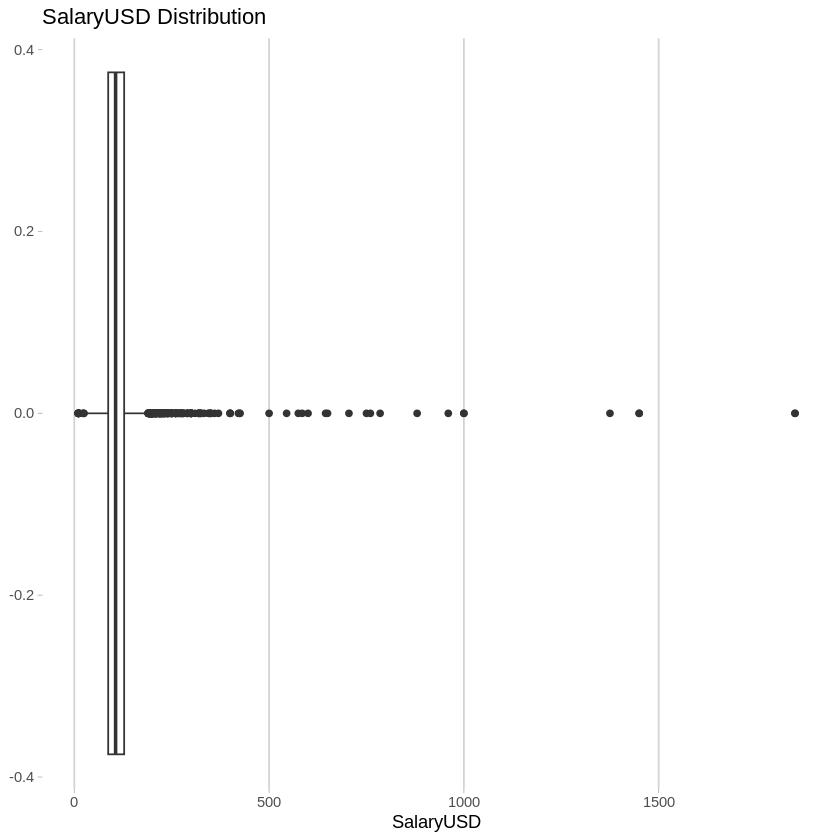

In [14]:
#Yu-Yu

salary %>%
  ggplot(aes(
      x = `SalaryUSD`)) +
  geom_boxplot() +
  theme_light() +
  theme_bw() +
  labs(title= "SalaryUSD Distribution")+
  theme(legend.position = "bottom", legend.title = element_blank()) +
  theme_light() +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.border = element_blank(),
    panel.grid.major.x = element_line(colour = "lightgrey")
    )

The Salary USD Distribution boxplot shows us that we have extreme outliers that actually discort the scale of our distribution.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


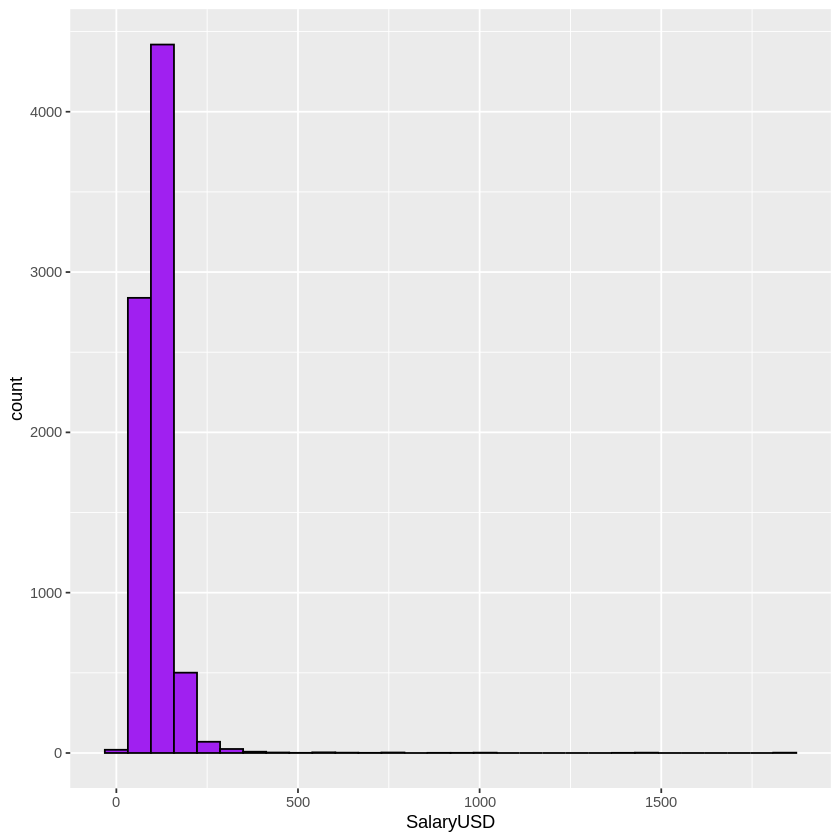

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


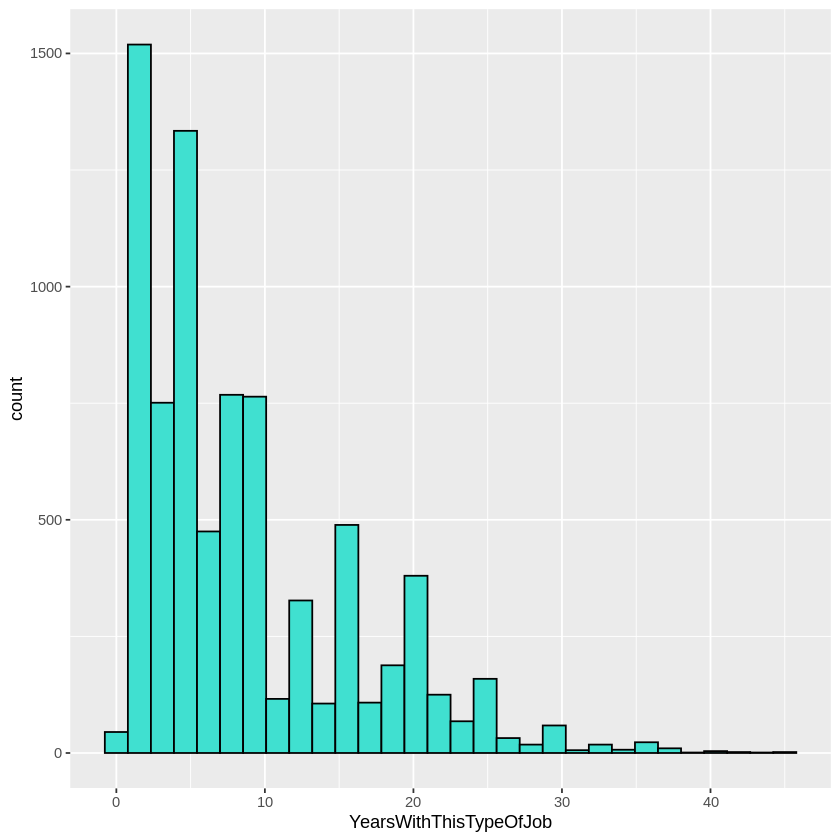

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 3413 rows containing non-finite values (`stat_bin()`).”


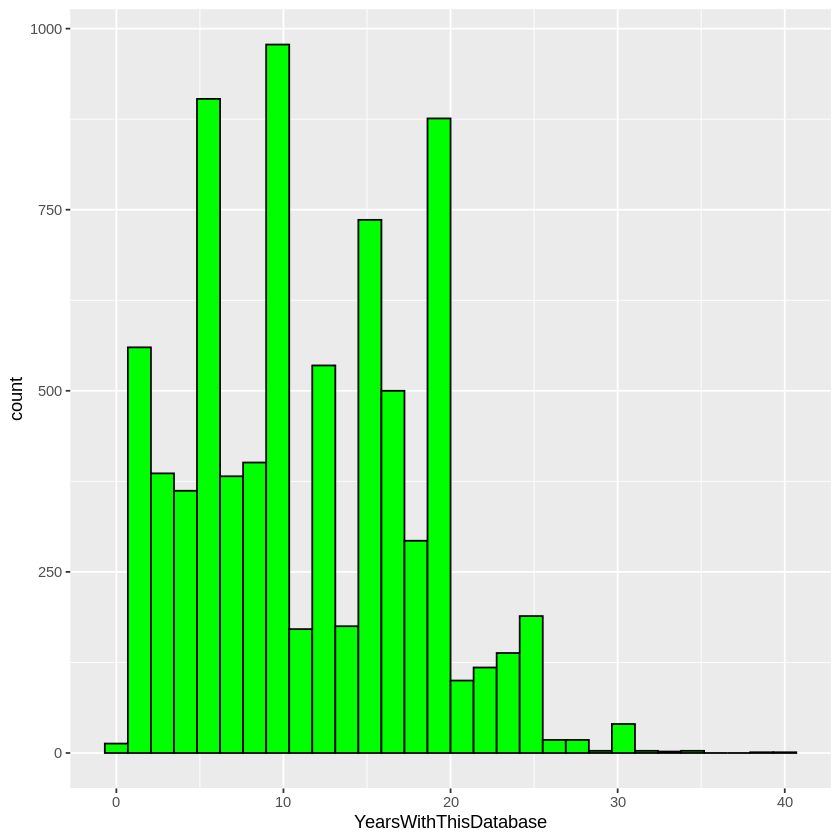

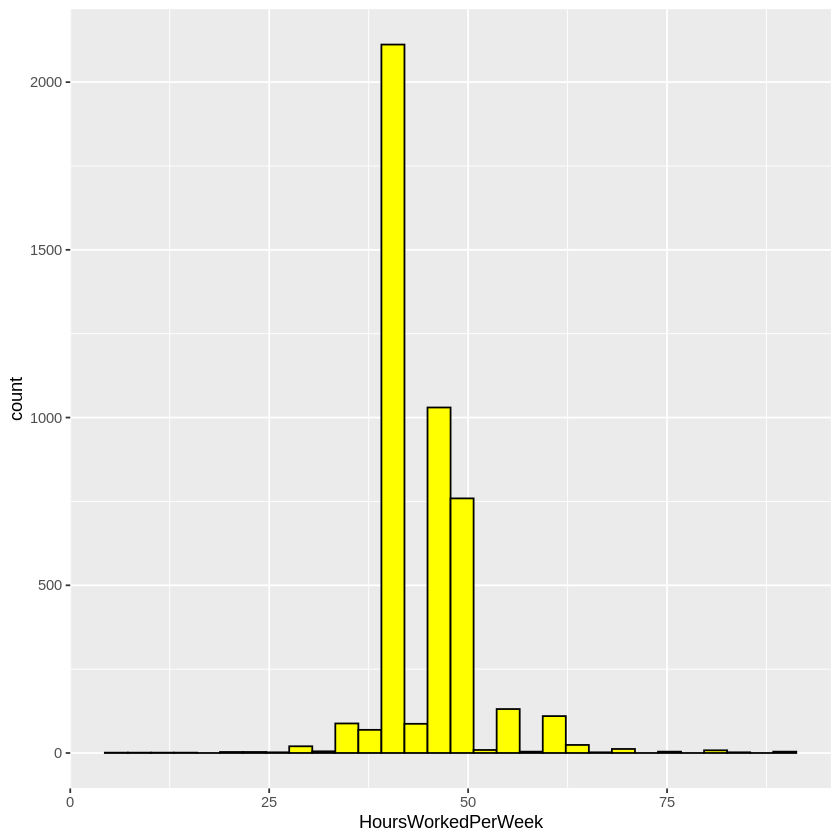

In [15]:
#Katherine
#Histograms for Numerical Variables
ggplot(data = salary) +
  geom_histogram(mapping = aes(x=SalaryUSD), color = "black", fill = "purple")

ggplot(data = salary) +
  geom_histogram(mapping = aes(x=YearsWithThisTypeOfJob), color = "black", fill = "turquoise")

ggplot(data = salary) +
  geom_histogram(mapping = aes(x=YearsWithThisDatabase), color = "black", fill = "green")

ggplot(data = salary) +
  geom_histogram(mapping = aes(x=HoursWorkedPerWeek), color = "black", fill = "yellow")

These histograms help us learn more about our variables. We are able to see the skewness, spread, center, and outliers present in the data. Most notably,

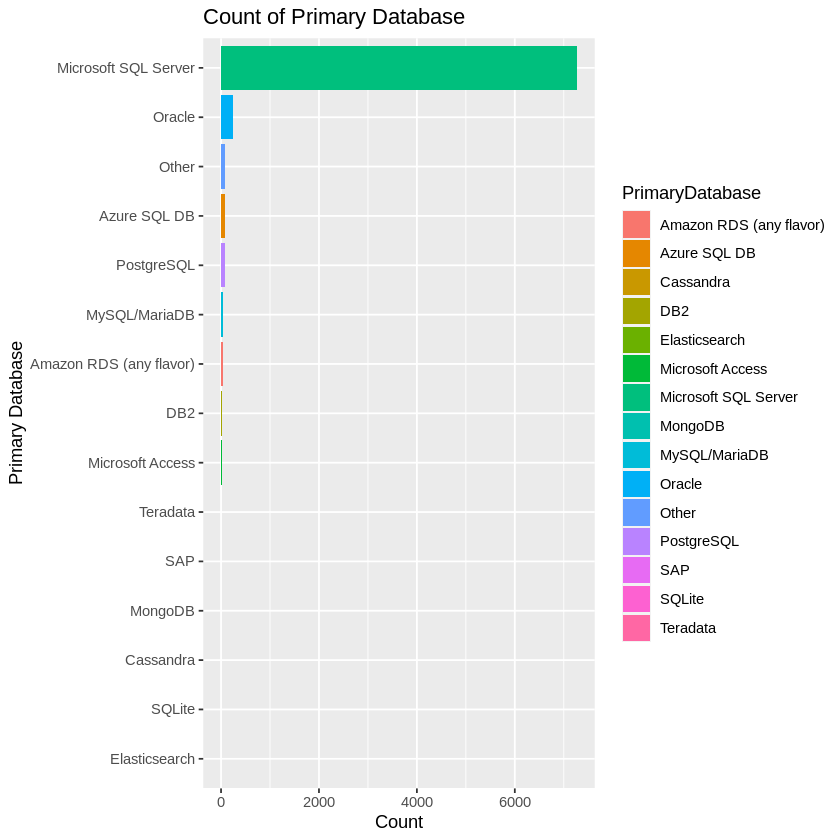

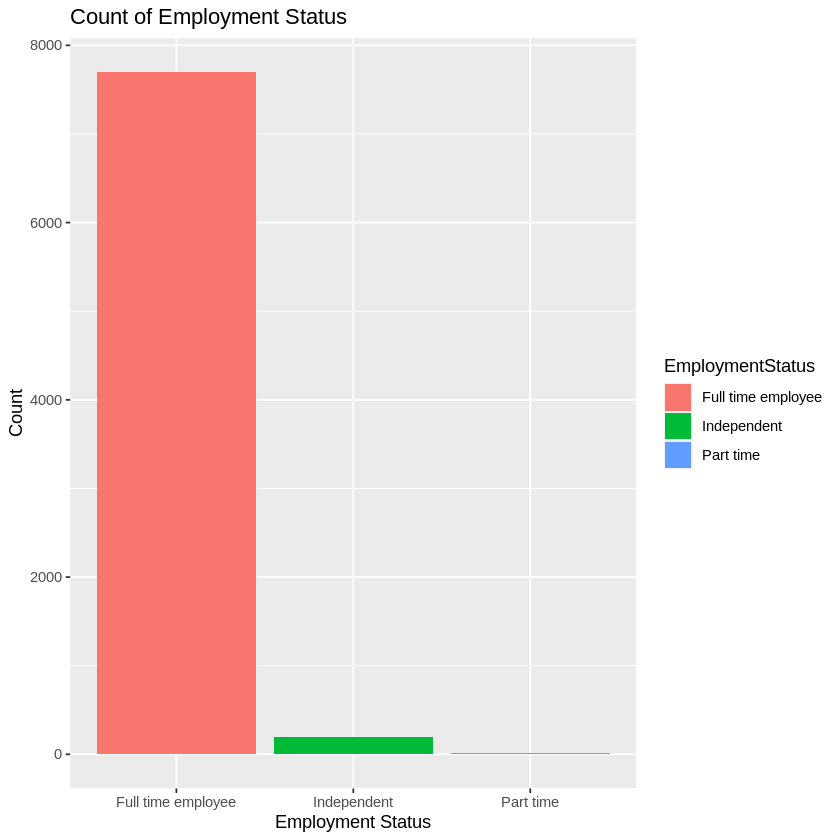

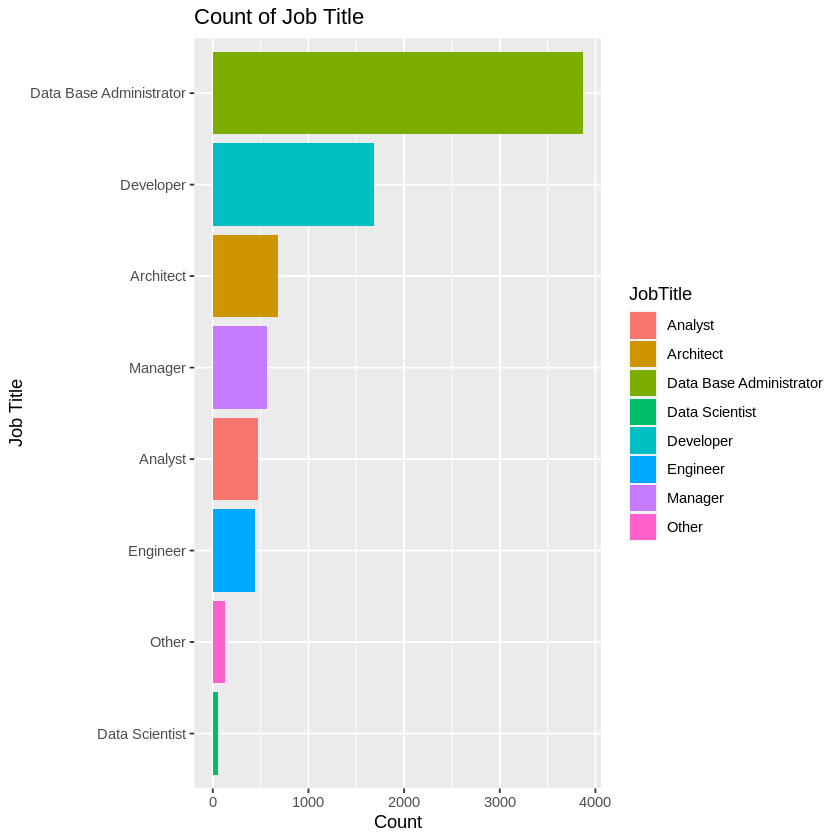

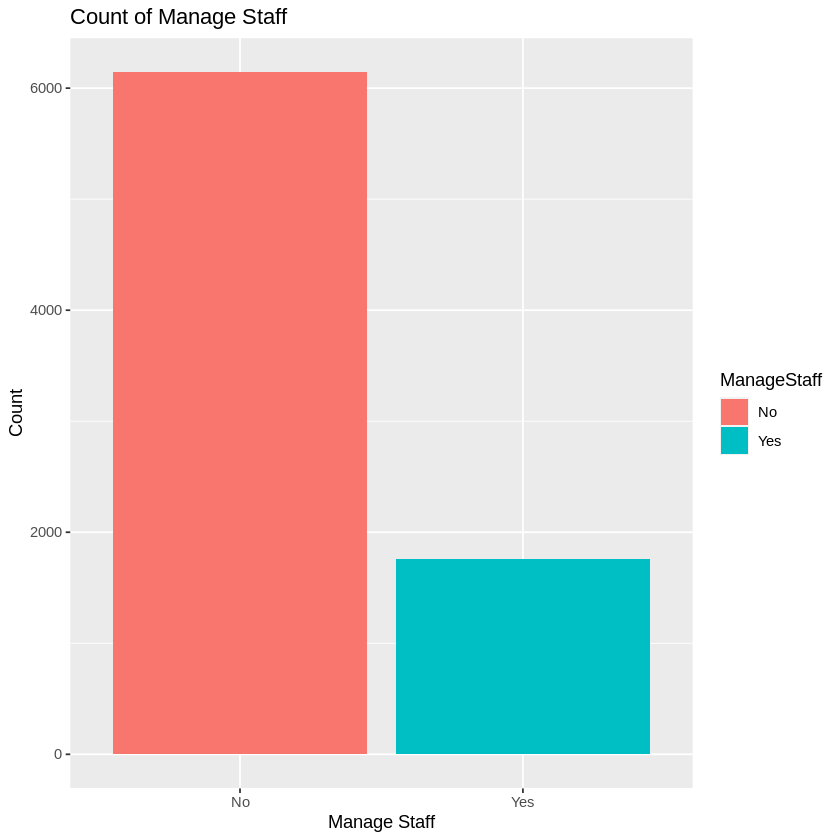

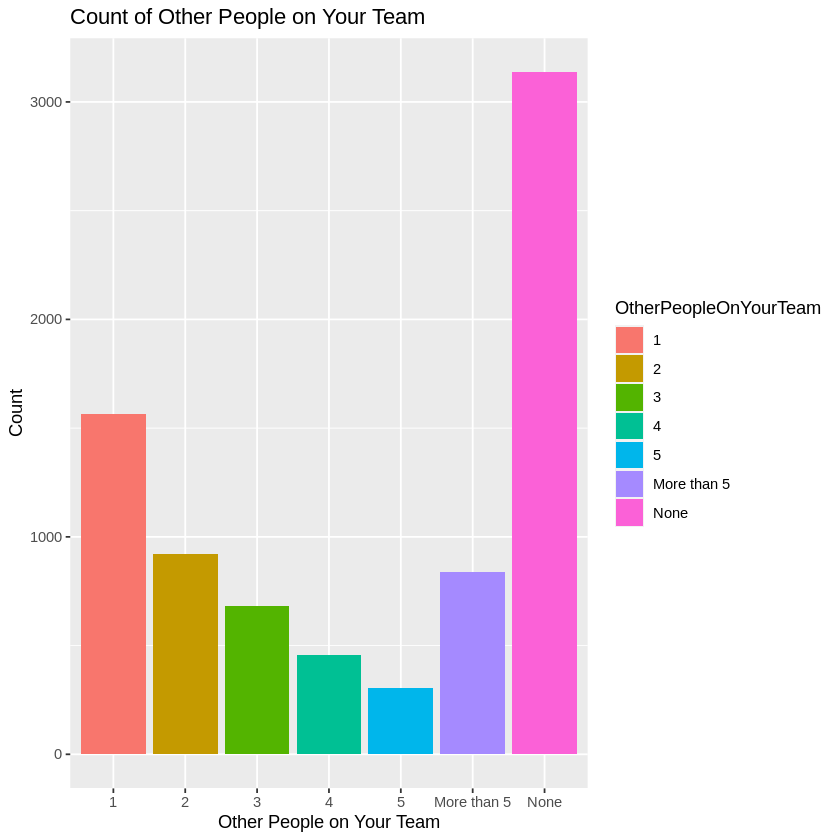

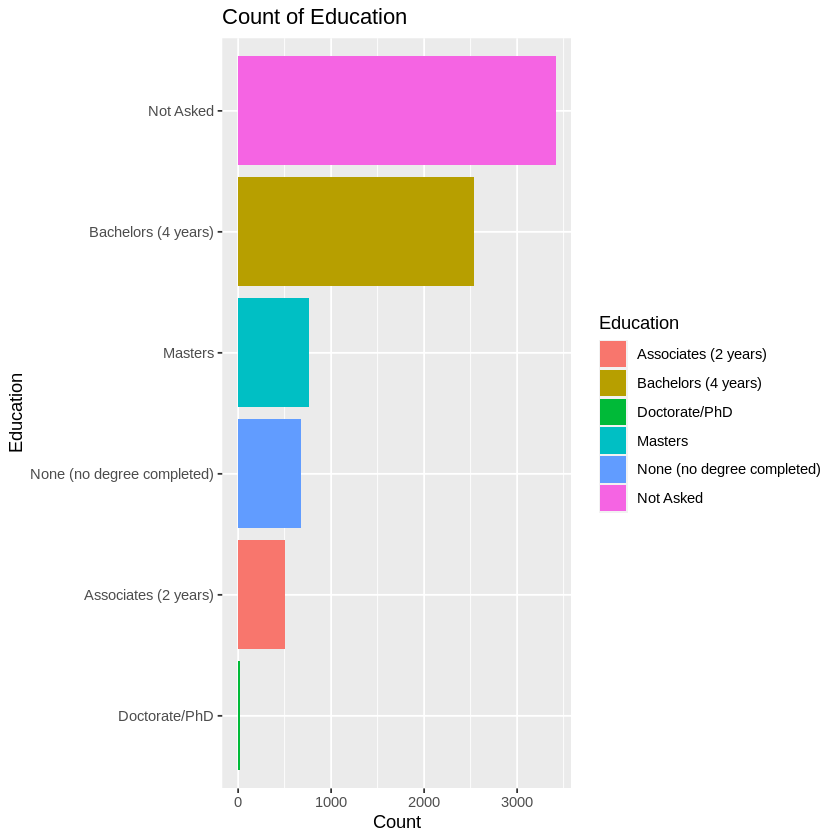

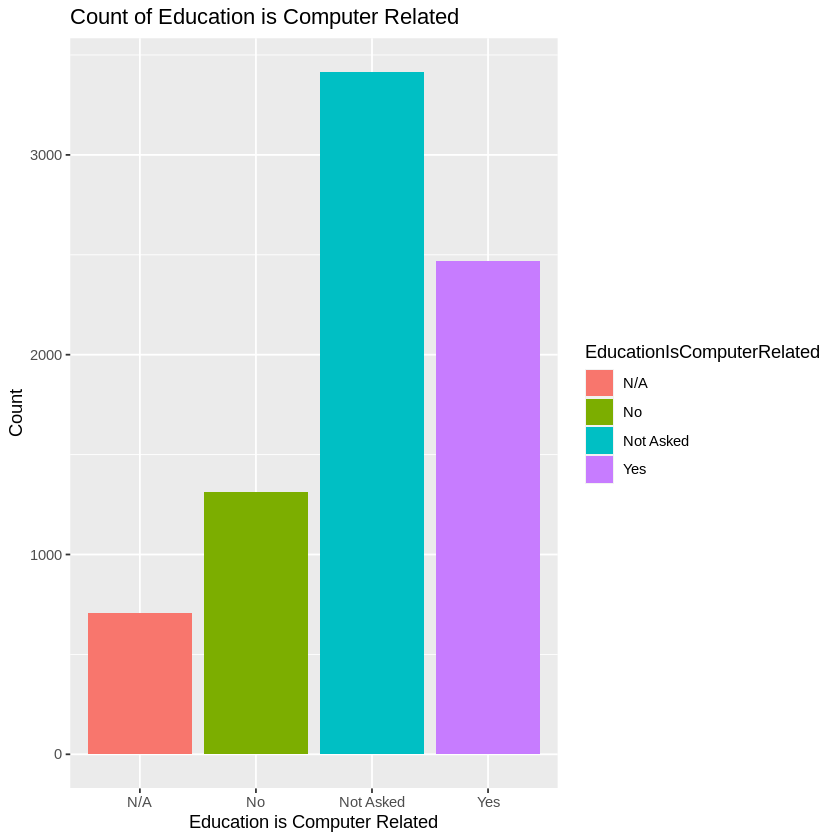

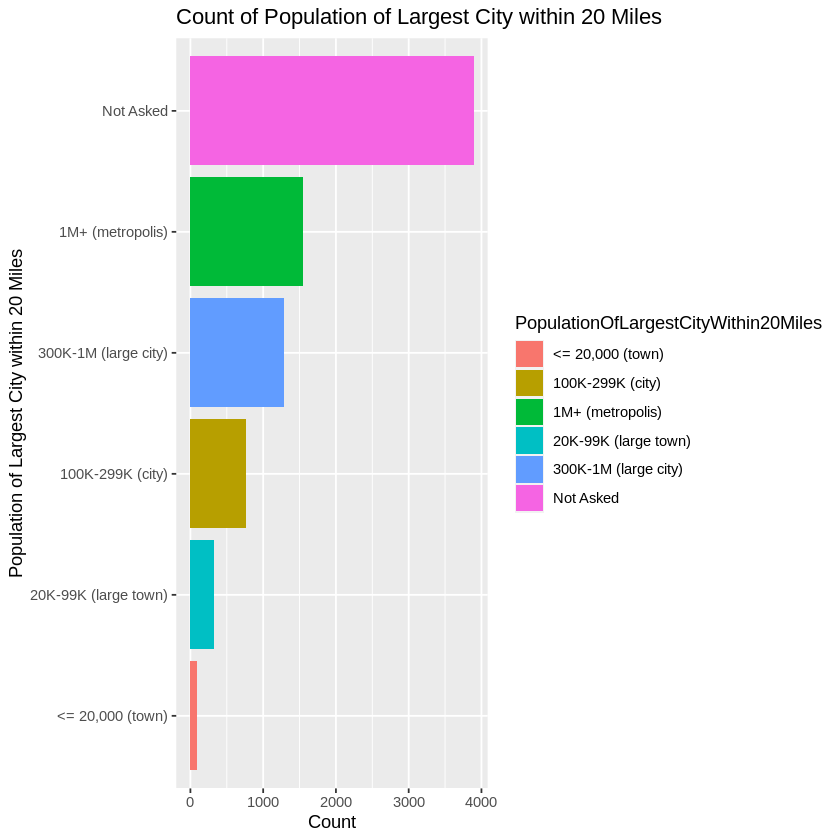

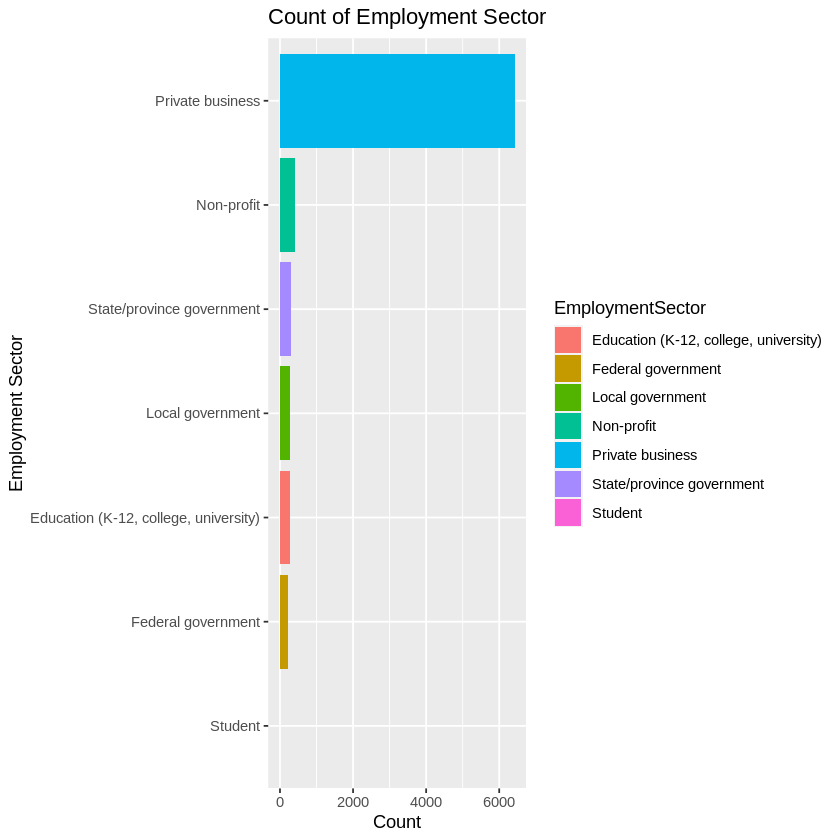

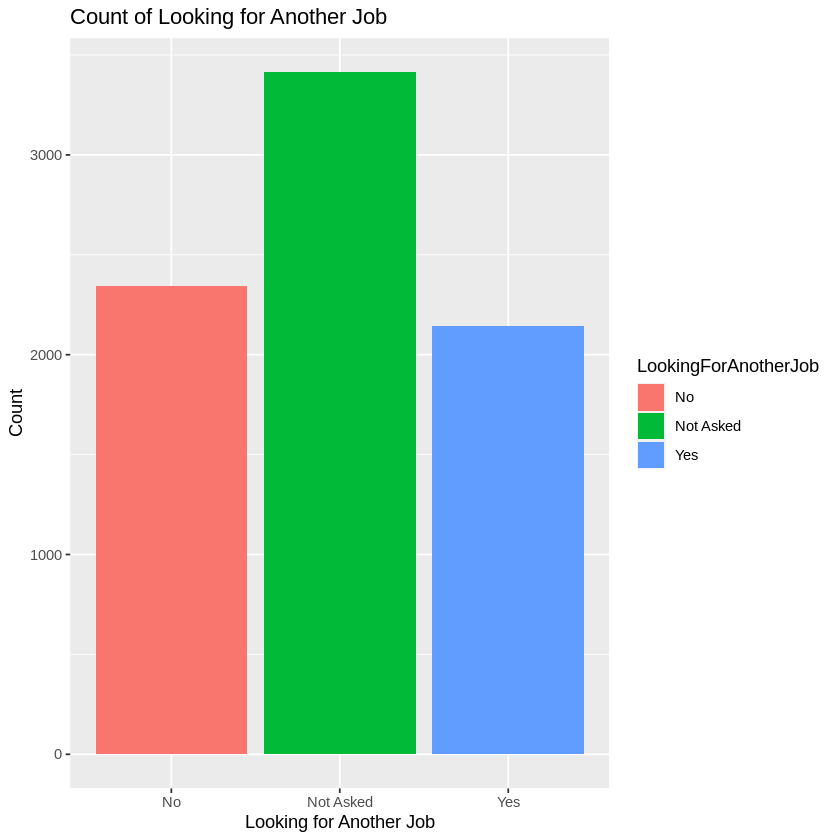

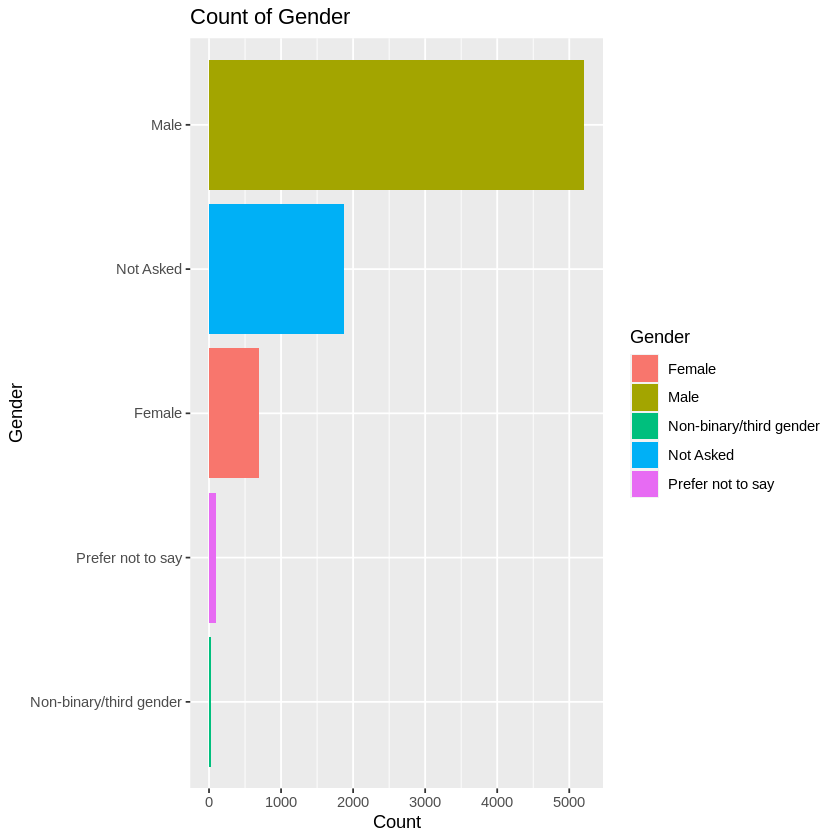

In [16]:
#Katherine
#Bar Plots of Categorical Variables

#Primary Database
ggplot(data = salary) +
  geom_bar(mapping = aes(x = fct_rev(fct_infreq(PrimaryDatabase)), fill = PrimaryDatabase)) +
ylab("Count") +
xlab("Primary Database") +
  ggtitle("Count of Primary Database") +
  coord_flip()

#Employment Status
ggplot(data = salary) +
  geom_bar(mapping = aes(x = EmploymentStatus, fill = EmploymentStatus)) +
ylab("Count") +
xlab("Employment Status") +
  ggtitle("Count of Employment Status")

#Job Title
#Employment Status
ggplot(data = salary) +
  geom_bar(mapping = aes(x = fct_rev(fct_infreq(JobTitle)), fill = JobTitle)) +
ylab("Count") +
xlab("Job Title") +
  ggtitle("Count of Job Title") +
  coord_flip()

#Manage Staff
ggplot(data = salary) +
  geom_bar(mapping = aes(x = ManageStaff, fill = ManageStaff)) +
ylab("Count") +
xlab("Manage Staff") +
  ggtitle("Count of Manage Staff")

#People on Your Team
ggplot(data = salary) +
  geom_bar(mapping = aes(x = OtherPeopleOnYourTeam, fill = OtherPeopleOnYourTeam)) +
ylab("Count") +
xlab("Other People on Your Team") +
  ggtitle("Count of Other People on Your Team")

#Education
ggplot(data = salary) +
  geom_bar(mapping = aes(x = fct_rev(fct_infreq(Education)), fill = Education)) +
ylab("Count") +
xlab("Education") +
  ggtitle("Count of Education") +
  coord_flip()

#Education is Computer Related
ggplot(data = salary) +
  geom_bar(mapping = aes(x = EducationIsComputerRelated, fill = EducationIsComputerRelated)) +
ylab("Count") +
xlab("Education is Computer Related") +
  ggtitle("Count of Education is Computer Related")

#Population of Largest City within 20 Miles
ggplot(data = salary) +
  geom_bar(mapping = aes(x = fct_rev(fct_infreq(PopulationOfLargestCityWithin20Miles)), fill = PopulationOfLargestCityWithin20Miles)) +
ylab("Count") +
xlab("Population of Largest City within 20 Miles") +
  ggtitle("Count of Population of Largest City within 20 Miles") +
  coord_flip()

#Employment Sector
ggplot(data = salary) +
  geom_bar(mapping = aes(x = fct_rev(fct_infreq(EmploymentSector)), fill = EmploymentSector)) +
ylab("Count") +
xlab("Employment Sector") +
  ggtitle("Count of Employment Sector") +
  coord_flip()

#Looking for Another Job
ggplot(data = salary) +
  geom_bar(mapping = aes(x = LookingForAnotherJob, fill = LookingForAnotherJob)) +
ylab("Count") +
xlab("Looking for Another Job") +
  ggtitle("Count of Looking for Another Job")

#Gender
ggplot(data = salary) +
  geom_bar(mapping = aes(x = fct_rev(fct_infreq(Gender)), fill = Gender)) +
ylab("Count") +
xlab("Gender") +
  ggtitle("Count of Gender") +
  coord_flip()



*   There are more males in this survey dataset.
*   The responses are quite close to being balanced between those looking for a job versus those not looking for a job
*   A majority of responses come from those who work in the private business sector.
*   A large proportion of the responses are from people who live in a city or larger.
*   The majority of responders have education is something computer related.
*   The majority of responders hold a bachelor's degree.
*   The majority of responders either work with 1 or 0 people on their team.
*   The minority of responders manage staff.
*   The most popular count of job title is Data Base Administrator.
*   There are more full-time employees in this dataset.
*   The most popular database that is used Microsoft SQL server.

JobTitle,n,percent
<chr>,<int>,<dbl>
Analyst,473,6
Architect,682,9
Data Base Administrator,3869,49
Data Scientist,57,1
Developer,1688,21
Engineer,443,6
Manager,569,7
Other,124,2


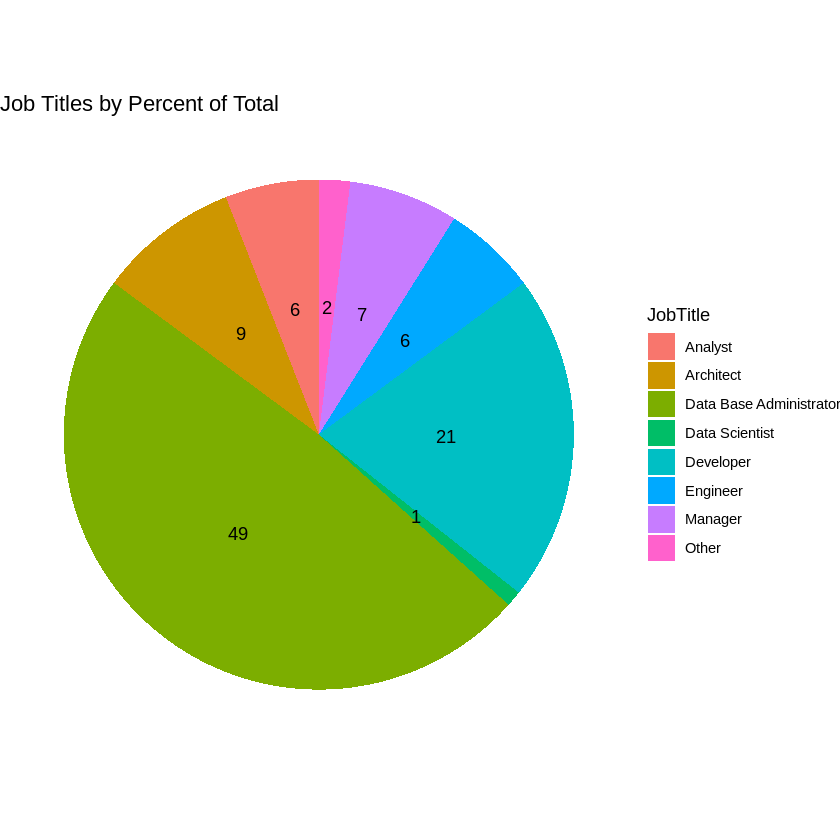

In [17]:
#Katherine
library(dplyr)
salary %>%
  group_by(JobTitle) %>%
  count() -> JobTitleCount

JobTitleCount %>%
  mutate(percent = round(100*n/sum(JobTitleCount$n))) -> JobTitlePercent
JobTitlePercent

ggplot(JobTitlePercent, aes(x = "", y = percent, fill = JobTitle)) +
  geom_col() +
  geom_text(aes(label = percent),
            position = position_stack(vjust = 0.5)) +
  coord_polar(theta = "y") +
  theme_void() +
  ggtitle("Job Titles by Percent of Total")

49% of the survey respondents are Data Base Administrators. This is the most popular job title for Data Professionals, followed by 21% who are Developers.

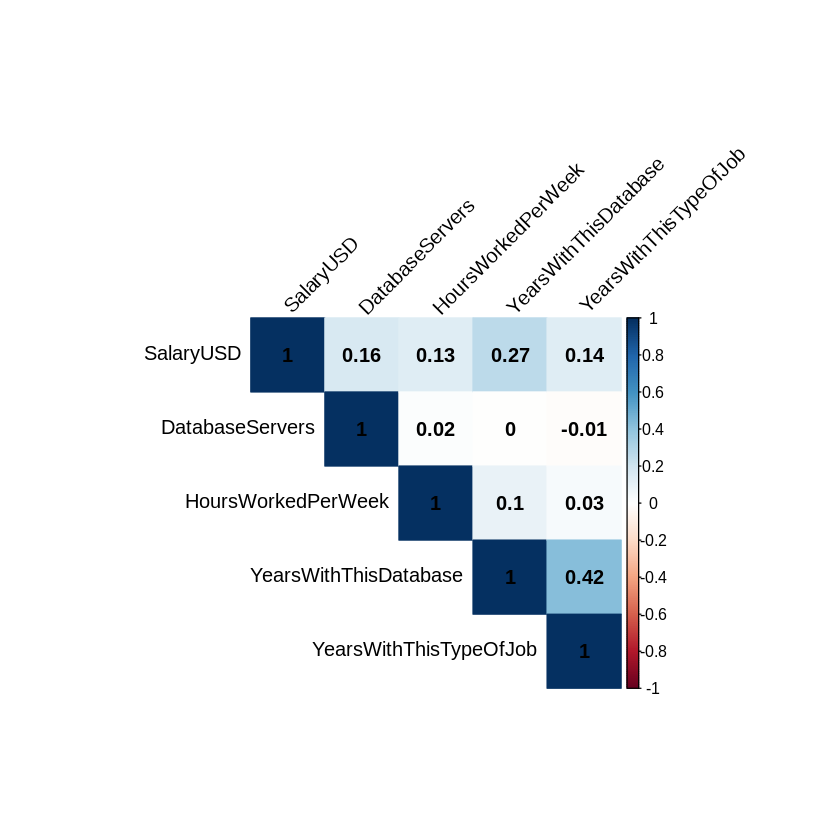

In [18]:
#Amy
# Identify the numeric columns in dataset
numeric_columns <- salary[, c("SalaryUSD", "YearsWithThisDatabase", "YearsWithThisTypeOfJob", "DatabaseServers", "HoursWorkedPerWeek")]

# Compute correlation matrix, ignoring NAs
correlation_matrix <- cor(numeric_columns, use = "complete.obs")


# Create a correlation plot
corrplot(correlation_matrix, method = "color", type = "upper", order = "hclust", tl.col = "black", tl.srt = 45, addCoef.col = "black")

This correlation matrix shows us the correlation matrix for our variables of interest. Here we see there is no presence of multicollinearity as none of the correlation coefficients are 0.7 or higher which would have indicated a strong correlation between the predictor variables.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwid

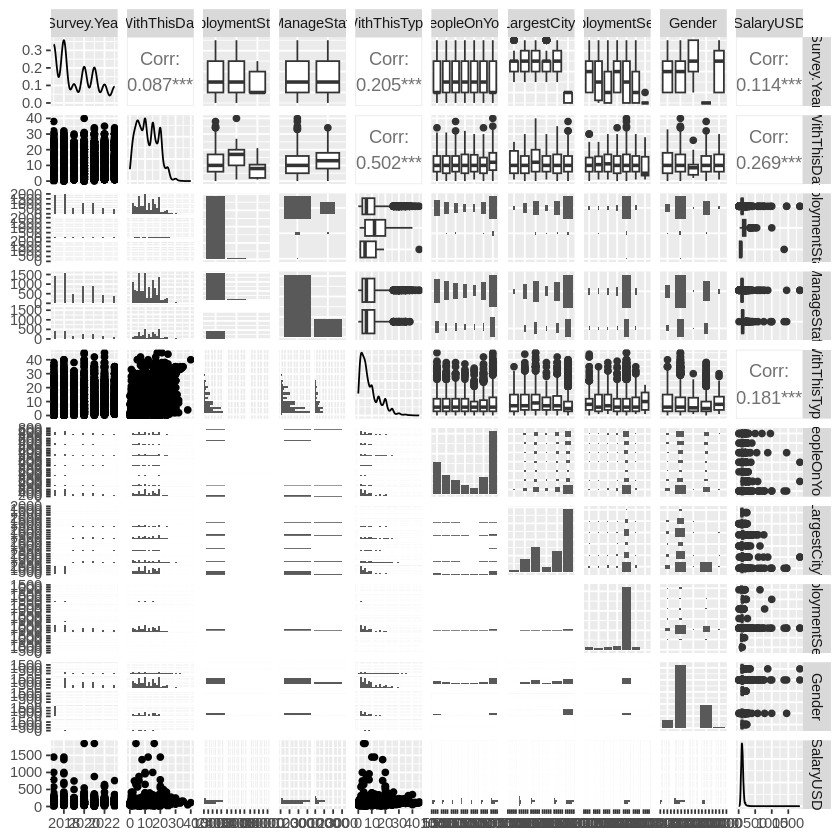

In [19]:
#Yu-Yu
#| message: false
# Subset salary dataframe
salary_subset <- salary[,c("Survey.Year", "YearsWithThisDatabase", "EmploymentStatus", "ManageStaff", "YearsWithThisTypeOfJob", "OtherPeopleOnYourTeam", "PopulationOfLargestCityWithin20Miles", "EmploymentSector", "Gender", "SalaryUSD")]
# Create ggpairs plot
ggpairs(salary_subset)

This ggpairs function returns

# Run the regression models and evaluate performance

In [20]:
#Katherine
salary_model <- lm(SalaryUSD ~ Survey.Year + PrimaryDatabase + YearsWithThisDatabase + EmploymentStatus + JobTitle + ManageStaff + YearsWithThisTypeOfJob + OtherPeopleOnYourTeam + DatabaseServers + Education + EducationIsComputerRelated + HoursWorkedPerWeek + PopulationOfLargestCityWithin20Miles + EmploymentSector + LookingForAnotherJob + Gender, data = salary)
summary(salary_model)


Call:
lm(formula = SalaryUSD ~ Survey.Year + PrimaryDatabase + YearsWithThisDatabase + 
    EmploymentStatus + JobTitle + ManageStaff + YearsWithThisTypeOfJob + 
    OtherPeopleOnYourTeam + DatabaseServers + Education + EducationIsComputerRelated + 
    HoursWorkedPerWeek + PopulationOfLargestCityWithin20Miles + 
    EmploymentSector + LookingForAnotherJob + Gender, data = salary)

Residuals:
    Min      1Q  Median      3Q     Max 
-206.92  -17.10   -3.10   11.07 1348.89 

Coefficients: (1 not defined because of singularities)
                                                           Estimate Std. Error
(Intercept)                                               1.370e+04  6.474e+03
Survey.Year                                              -6.768e+00  3.208e+00
PrimaryDatabaseAzure SQL DB                              -3.768e+01  2.291e+01
PrimaryDatabaseCassandra                                 -1.283e+01  4.091e+01
PrimaryDatabaseDB2                                       -5.421e+01  2

The linear regression model reveals that several factors significantly influence salary. Notably, years of experience with a specific database, employment status (particularly for independent contractors and part-time employees), job title (especially for architects and managers), and management responsibilities positively correlate with higher salaries. Additionally, higher education levels, particularly Doctorate/PhD and Masters degrees, and having a computer-related education, are associated with increased salaries. Other key contributors include the number of hours worked per week, the sector of employment (with the Federal government and private business sectors showing positive associations), and individuals not actively looking for another job. Furthermore, males tend to have higher salaries than other gender categories. Overall, these factors collectively contribute to the model's ability to predict salaries, explaining approximately 20.18% of the variance in salary values.

In [21]:
#Katherine
salary_model2 <- lm(SalaryUSD ~ Survey.Year + PrimaryDatabase + YearsWithThisDatabase + EmploymentStatus + JobTitle + ManageStaff + YearsWithThisTypeOfJob + Education + HoursWorkedPerWeek + EmploymentSector + LookingForAnotherJob, data = salary)
summary(salary_model2)


Call:
lm(formula = SalaryUSD ~ Survey.Year + PrimaryDatabase + YearsWithThisDatabase + 
    EmploymentStatus + JobTitle + ManageStaff + YearsWithThisTypeOfJob + 
    Education + HoursWorkedPerWeek + EmploymentSector + LookingForAnotherJob, 
    data = salary)

Residuals:
    Min      1Q  Median      3Q     Max 
-206.02  -17.28   -3.16   11.47 1350.69 

Coefficients:
                                            Estimate Std. Error t value
(Intercept)                               -1776.2556  2346.1309  -0.757
Survey.Year                                   0.9519     1.1621   0.819
PrimaryDatabaseAzure SQL DB                -113.6269    21.9332  -5.181
PrimaryDatabaseCassandra                    -87.8538    40.7513  -2.156
PrimaryDatabaseDB2                         -126.9614    23.3961  -5.427
PrimaryDatabaseElasticsearch                -38.6398    54.8786  -0.704
PrimaryDatabaseMicrosoft Access            -153.0875    23.9670  -6.387
PrimaryDatabaseMicrosoft SQL Server        -125.2705  

The variables that are not significant include: OtherPeopleOnYourTeam, Survey.Year, YearsWithThisDatabase,

In [22]:
#Yu-Yu
# remove Education, EducationIsComputerRelated, HoursWorkedPerWeek, LookingForAnotherJob due to Not Asked from 2020 to 2023
# remove DatabaseServers due to Not Asked in 2021
salary_full <- lm(SalaryUSD ~ Survey.Year + YearsWithThisDatabase + EmploymentStatus + YearsWithThisTypeOfJob + OtherPeopleOnYourTeam +  PopulationOfLargestCityWithin20Miles + EmploymentSector  + Gender, data = salary)
salary_null <- lm(SalaryUSD ~ 1, data = salary)
step_out <- step(salary_null,
                 scope = list(lower = salary_null, upper = salary_full),
                 method = "both")

Start:  AIC=64659.23
SalaryUSD ~ 1

                                       Df Sum of Sq      RSS   AIC
+ YearsWithThisDatabase                 1   2046584 26144979 64065
+ EmploymentStatus                      2    948240 27243324 64393
+ YearsWithThisTypeOfJob                1    926772 27264791 64397
+ PopulationOfLargestCityWithin20Miles  5    631261 27560303 64490
+ EmploymentSector                      6    432090 27759474 64549
+ Survey.Year                           1    368535 27823028 64557
+ Gender                                4    102054 28089509 64639
+ OtherPeopleOnYourTeam                 6    105543 28086020 64642
<none>                                              28191563 64659

Step:  AIC=64065.46
SalaryUSD ~ YearsWithThisDatabase

                                       Df Sum of Sq      RSS   AIC
+ EmploymentStatus                      2    724196 25420784 63847
+ PopulationOfLargestCityWithin20Miles  5    489909 25655070 63926
+ EmploymentSector                   

In [23]:
#Yu-Yu
step_model <- lm(SalaryUSD ~ YearsWithThisDatabase + EmploymentStatus + PopulationOfLargestCityWithin20Miles +
    EmploymentSector + Survey.Year + OtherPeopleOnYourTeam +
    YearsWithThisTypeOfJob, data = salary)
summary(step_model)


Call:
lm(formula = SalaryUSD ~ YearsWithThisDatabase + EmploymentStatus + 
    PopulationOfLargestCityWithin20Miles + EmploymentSector + 
    Survey.Year + OtherPeopleOnYourTeam + YearsWithThisTypeOfJob, 
    data = salary)

Residuals:
    Min      1Q  Median      3Q     Max 
-139.97  -19.74   -4.97   12.20 1741.54 

Coefficients:
                                                           Estimate Std. Error
(Intercept)                                              -7611.9904  1350.3967
YearsWithThisDatabase                                        1.9764     0.1094
EmploymentStatusIndependent                                 55.4917     4.0379
EmploymentStatusPart time                                   78.4974    16.8118
PopulationOfLargestCityWithin20Miles100K-299K (city)         3.3449     6.2790
PopulationOfLargestCityWithin20Miles1M+ (metropolis)        22.7146     6.1158
PopulationOfLargestCityWithin20Miles20K-99K (large town)     2.3752     6.6963
PopulationOfLargestCityWithin20Mil

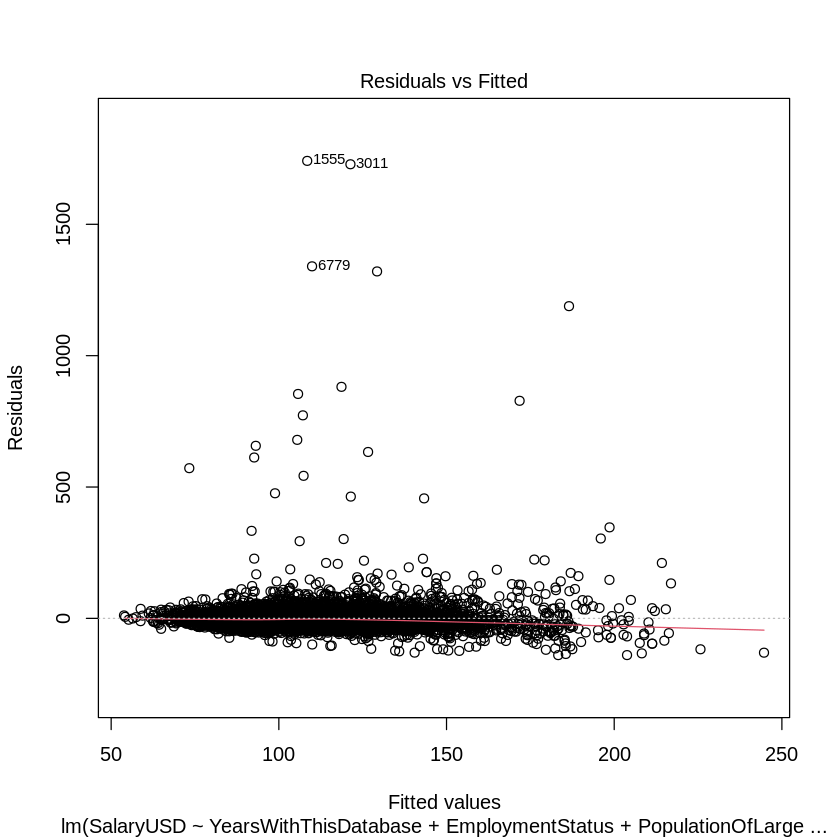

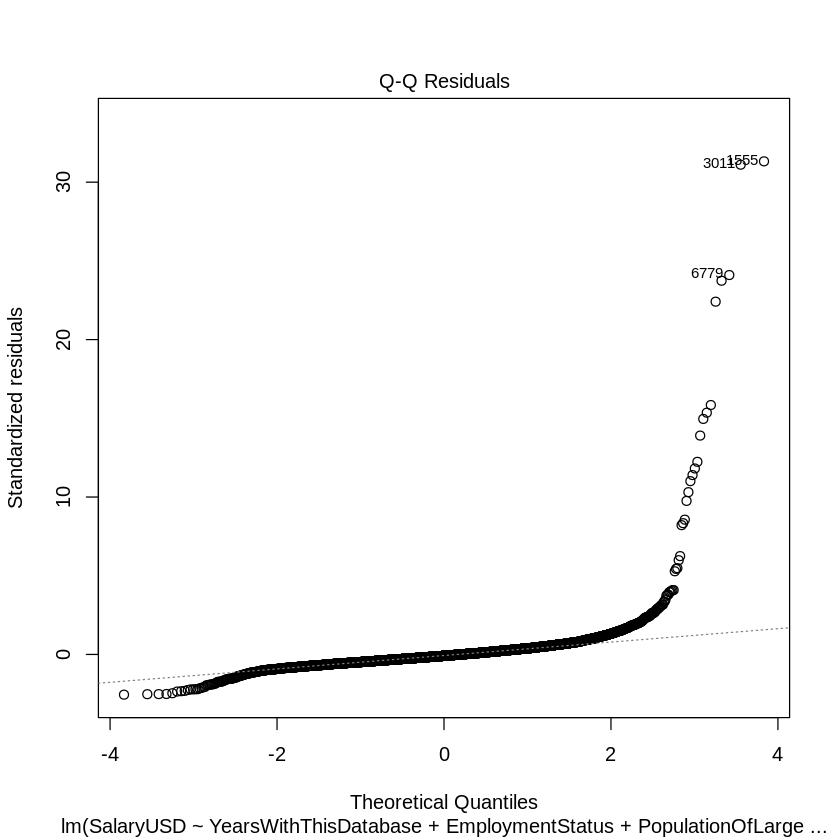

In [24]:
#Amy - Residuals vs Fitted plot of best step regression model above
plot(step_model, which = 1) #consider homoscedasticity- is there random variance around the horizontal line?

#Normal QQ plot to consider normality assumption of residuals. Do the points fall along the diagnol?
plot(step_model, which = 2)

In [25]:
#Ridge & Lasso- Yu-Yu
# Preparing data
set.seed(123)
Z <- sample(nrow(salary), .5 * nrow(salary))
salary_train <- salary[Z,]
salary_test <- salary[-Z,]
# remove PrimaryDatabase and JobTitle
reg_train <- lm(SalaryUSD ~ Survey.Year + YearsWithThisDatabase + EmploymentStatus + ManageStaff + YearsWithThisTypeOfJob + OtherPeopleOnYourTeam +  PopulationOfLargestCityWithin20Miles + EmploymentSector  + Gender, data = salary_train)
x_train <- model.matrix(reg_train)[,-1]
y_train <- salary_train$SalaryUSD

reg_test <- lm(SalaryUSD ~ Survey.Year + YearsWithThisDatabase + EmploymentStatus + ManageStaff + YearsWithThisTypeOfJob + OtherPeopleOnYourTeam +  PopulationOfLargestCityWithin20Miles + EmploymentSector  + Gender, data = salary_test)
x_test <- model.matrix(reg_test)[,-1]
y_test <- salary_test$SalaryUSD


Call:  cv.glmnet(x = x_train, y = y_train, alpha = 0) 

Measure: Mean-Squared Error 

    Lambda Index Measure    SE Nonzero
min    1.6   100    1836 457.6      27
1se  920.4    32    2288 453.8      27

[1] 4312.616

[1] 27

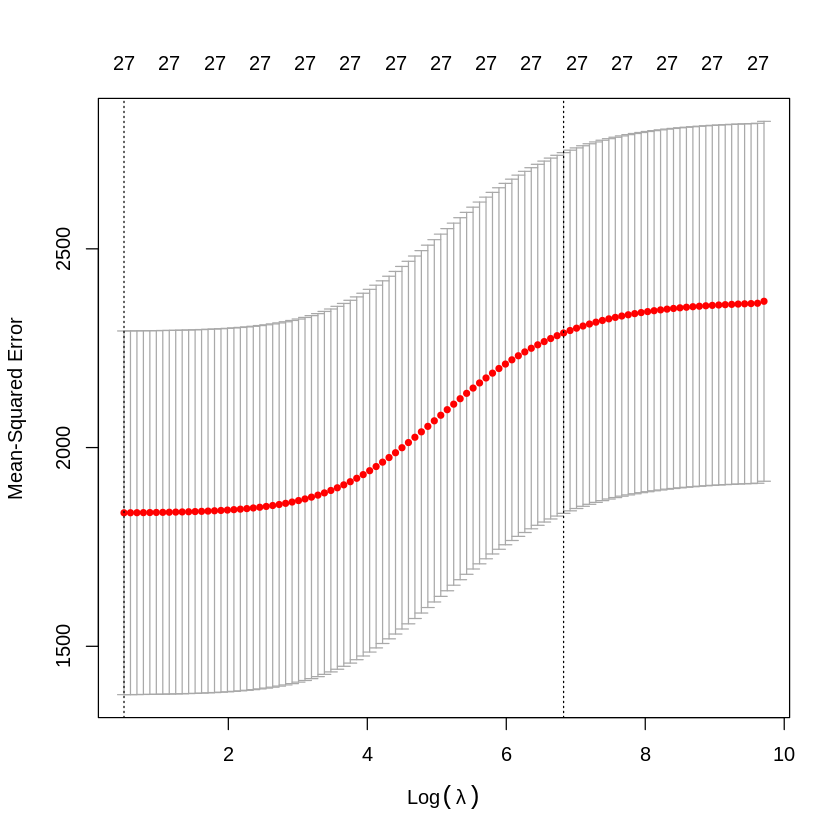

In [26]:
# Ridge Regression
set.seed(123)
r_train_cv <- cv.glmnet(x_train, y_train, alpha = 0)
r_train_cv
plot(r_train_cv)
ridge_min <- glmnet(x_train, y_train, alpha = 0, lambda = r_train_cv$lambda.min)
yHat <- predict(ridge_min, newx = x_test, s = "lambda.min")
pmse_r <-  mean((yHat - y_test)^2)
pmse_r
ridge_min$df


Call:  cv.glmnet(x = x_train, y = y_train) 

Measure: Mean-Squared Error 

    Lambda Index Measure    SE Nonzero
min  0.047    64    1834 458.0      24
1se 13.668     3    2285 452.9       1

28 x 1 sparse Matrix of class "dgCMatrix"
                                                                    s0
(Intercept)                                              -6.501025e+03
Survey.Year                                               3.243101e+00
YearsWithThisDatabase                                     1.812632e+00
EmploymentStatusIndependent                               5.820112e+01
EmploymentStatusPart time                                -3.210917e+01
ManageStaffYes                                            1.484950e+01
YearsWithThisTypeOfJob                                    4.742833e-01
OtherPeopleOnYourTeam2                                   -2.081717e+00
OtherPeopleOnYourTeam3                                    3.703696e+00
OtherPeopleOnYourTeam4                                   -1.804471e+00
OtherPeopleOnYourTeam5                                   -2.442463e+00
OtherPeopleOnYourTeamMore than 5                          6.579289e+00
OtherPeopleOnYourTeamNone          

[1] 4310.078

[1] 24

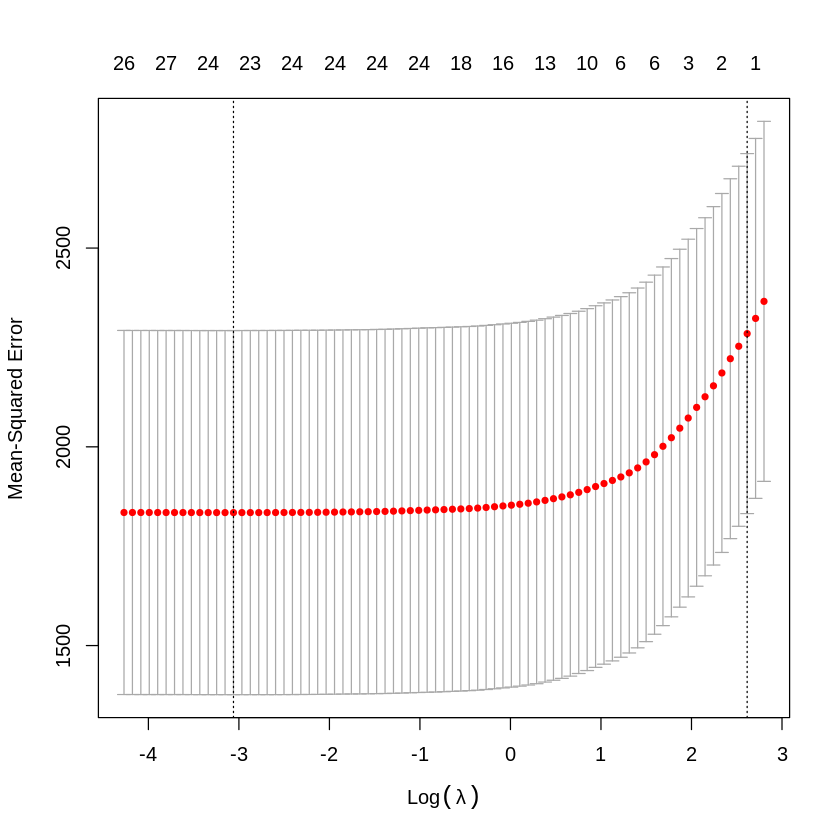

In [27]:
# Lasso Regression
set.seed(123)
l_train_cv <- cv.glmnet(x_train, y_train)
l_train_cv
plot(l_train_cv)
lasso_min <- glmnet(x_train, y_train, lambda = l_train_cv$lambda.min)
coef(lasso_min)
yHat <- predict(lasso_min, newx = x_test, s = "lambda.min")
pmse_lmin <- mean((yHat - y_test)^2)
pmse_lmin
lasso_min$df

In the Ridge Regression, the optimal lambda value is 1.6, yielding a model with 27 non-zero coefficients. The minimum mean-squared error (PMSE) on the test set is 4312.62.

For Lasso Regression, the optimal lambda is 0.047, resulting in 24 non-zero coefficients. The PMSE on the test set is 4310.08.

Both methods effectively reduce the feature space, with Lasso achieving slightly lower PMSE and fewer non-zero coefficients. The chosen lambda values in both methods help prevent overfitting while maintaining predictive accuracy on the test set.

# Run the classification models and evaluate performance

In [28]:
#Katherine- Logistic Regression
#Filter 'Not Asked'
salary1 <- salary %>%
  filter(Survey.Year < 2020)
salary1$LookingForAnotherJob <- as.factor(salary1$LookingForAnotherJob)
levels(salary1$LookingForAnotherJob)
summary(salary1)

[1] "No"  "Yes"

  Survey.Year     SalaryUSD                  PrimaryDatabase
 Min.   :2017   Min.   :  11.1   Microsoft SQL Server:4214  
 1st Qu.:2017   1st Qu.:  85.0   Oracle              : 140  
 Median :2018   Median : 102.0   PostgreSQL          :  30  
 Mean   :2018   Mean   : 107.5   Other               :  26  
 3rd Qu.:2018   3rd Qu.: 122.0   Azure SQL DB        :  15  
 Max.   :2019   Max.   :1450.0   MySQL/MariaDB       :  15  
                                 (Other)             :  52  
 YearsWithThisDatabase           EmploymentStatus   JobTitle        
 Min.   : 0.00         Full time employee:4376    Length:4492       
 1st Qu.: 6.00         Independent       : 109    Class :character  
 Median :10.00         Part time         :   7    Mode  :character  
 Mean   :11.31                                                      
 3rd Qu.:16.00                                                      
 Max.   :38.00                                                      
                             

The filtered dataset, focusing on years before 2020, highlights key insights for data professionals:

Job Details: Predominantly full-time employees working with Microsoft SQL Server.
Inclusion of Oracle and PostgreSQL professionals.

Experience and Employment: Median of 10 years of experience with the current database.
Mix of full-time, independent, and part-time roles.

Management and Teams: About 28% have management responsibilities. Dataset covers various team sizes.

Education and Tech Background: Diverse education levels, with a majority having a Bachelor's degree.
Significant presence of professionals with a computer-related education.

Work and Location: Average of 44 working hours per week.
Represents professionals across different city sizes and employment sectors.

Job Search Intent: Balanced distribution of job search intent (No: 52%, Yes: 48%).

In [29]:
#Katherine
#Logistic Regression - Full Model
logfull <- glm(LookingForAnotherJob ~ SalaryUSD + Survey.Year + PrimaryDatabase + YearsWithThisDatabase + EmploymentStatus + JobTitle + ManageStaff + YearsWithThisTypeOfJob + OtherPeopleOnYourTeam + DatabaseServers + Education + EducationIsComputerRelated + HoursWorkedPerWeek + PopulationOfLargestCityWithin20Miles + EmploymentSector  + Gender, data = salary1, family = binomial)
summary(logfull)


Call:
glm(formula = LookingForAnotherJob ~ SalaryUSD + Survey.Year + 
    PrimaryDatabase + YearsWithThisDatabase + EmploymentStatus + 
    JobTitle + ManageStaff + YearsWithThisTypeOfJob + OtherPeopleOnYourTeam + 
    DatabaseServers + Education + EducationIsComputerRelated + 
    HoursWorkedPerWeek + PopulationOfLargestCityWithin20Miles + 
    EmploymentSector + Gender, family = binomial, data = salary1)

Coefficients: (1 not defined because of singularities)
                                                           Estimate Std. Error
(Intercept)                                               2.261e+02  2.556e+02
SalaryUSD                                                -2.332e-03  8.469e-04
Survey.Year                                              -1.119e-01  1.266e-01
PrimaryDatabaseAzure SQL DB                              -1.200e+00  9.945e-01
PrimaryDatabaseCassandra                                 -1.000e+00  1.650e+00
PrimaryDatabaseDB2                                       -1

In [30]:
#Katherine
#Logistic Regression - Reduced Model
logreduced <- glm(LookingForAnotherJob ~ SalaryUSD + YearsWithThisDatabase + EmploymentStatus +
    JobTitle + EmploymentSector + PrimaryDatabase + ManageStaff +
    HoursWorkedPerWeek + Education + YearsWithThisTypeOfJob,
              data = salary1, family = binomial)
summary(logreduced)


Call:
glm(formula = LookingForAnotherJob ~ SalaryUSD + YearsWithThisDatabase + 
    EmploymentStatus + JobTitle + EmploymentSector + PrimaryDatabase + 
    ManageStaff + HoursWorkedPerWeek + Education + YearsWithThisTypeOfJob, 
    family = binomial, data = salary1)

Coefficients:
                                            Estimate Std. Error z value
(Intercept)                               -7.345e-02  7.749e-01  -0.095
SalaryUSD                                 -2.437e-03  8.268e-04  -2.948
YearsWithThisDatabase                     -5.429e-03  5.881e-03  -0.923
EmploymentStatusIndependent                2.908e-01  2.047e-01   1.420
EmploymentStatusPart time                 -3.423e-01  8.714e-01  -0.393
JobTitleArchitect                         -3.224e-01  1.752e-01  -1.841
JobTitleData Base Administrator           -3.656e-01  1.411e-01  -2.591
JobTitleData Scientist                    -8.891e-01  4.709e-01  -1.888
JobTitleDeveloper                         -3.041e-01  1.482e-01  -2.0

The logistic regression model, focusing on key predictors, reveals insights into factors influencing job search intent among data professionals.

Job Title Significance: Certain job titles, including Data Base Administrator, Developer, and Manager, are associated with increased job search intent.

Employment Sector Influence: Professionals in private business and local government show potential associations with higher job search intent.

Database Technology Impact: Azure SQL DB and Elasticsearch professionals may have higher job search intent.

Work Hours and Education: Longer working hours and a Bachelor's degree are linked to increased job search intent.

Experience and Management: YearsWithThisTypeOfJob and ManageStaff have no significant impact.


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




Classification tree:
rpart(formula = LookingForAnotherJob ~ Survey.Year + PrimaryDatabase + 
    YearsWithThisDatabase + EmploymentStatus + JobTitle + ManageStaff + 
    YearsWithThisTypeOfJob + OtherPeopleOnYourTeam + Education + 
    EducationIsComputerRelated + HoursWorkedPerWeek + PopulationOfLargestCityWithin20Miles + 
    EmploymentSector + Gender, data = salary1_train, method = "class")

Variables actually used in tree construction:
[1] HoursWorkedPerWeek     JobTitle               OtherPeopleOnYourTeam 
[4] YearsWithThisDatabase  YearsWithThisTypeOfJob

Root node error: 1084/2246 = 0.48264

n= 2246 

        CP nsplit rel error  xerror     xstd
1 0.057196      0   1.00000 1.00000 0.021847
2 0.015683      1   0.94280 0.96033 0.021801
3 0.010000      5   0.87638 0.97786 0.021825
Call:
rpart(formula = LookingForAnotherJob ~ Survey.Year + PrimaryDatabase + 
    YearsWithThisDatabase + EmploymentStatus + JobTitle + ManageStaff + 
    YearsWithThisTypeOfJob + OtherPeopleOnYourTeam +

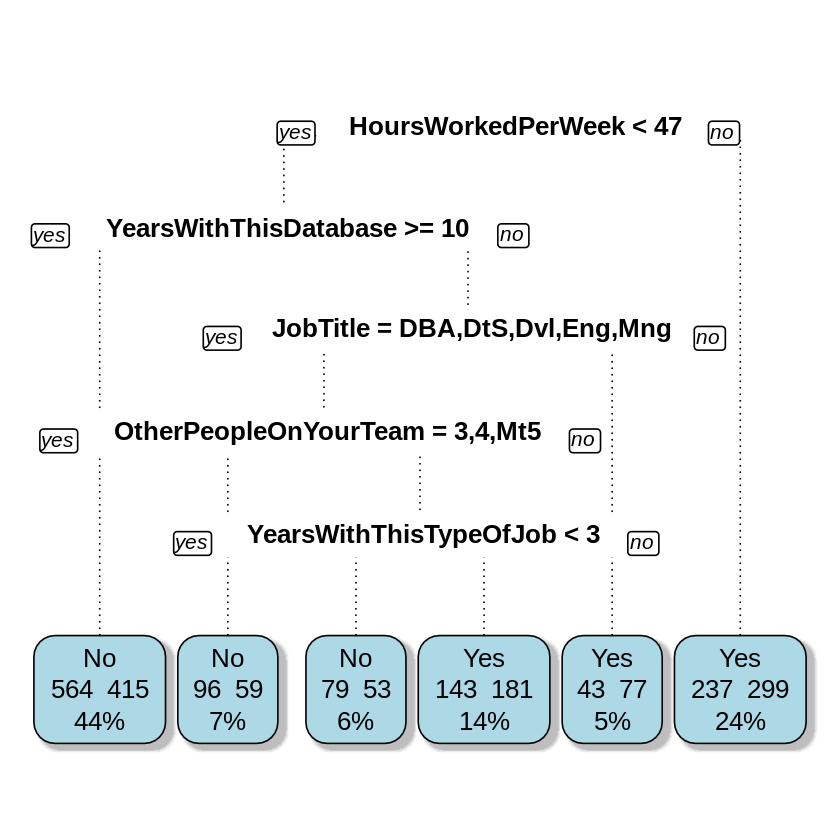

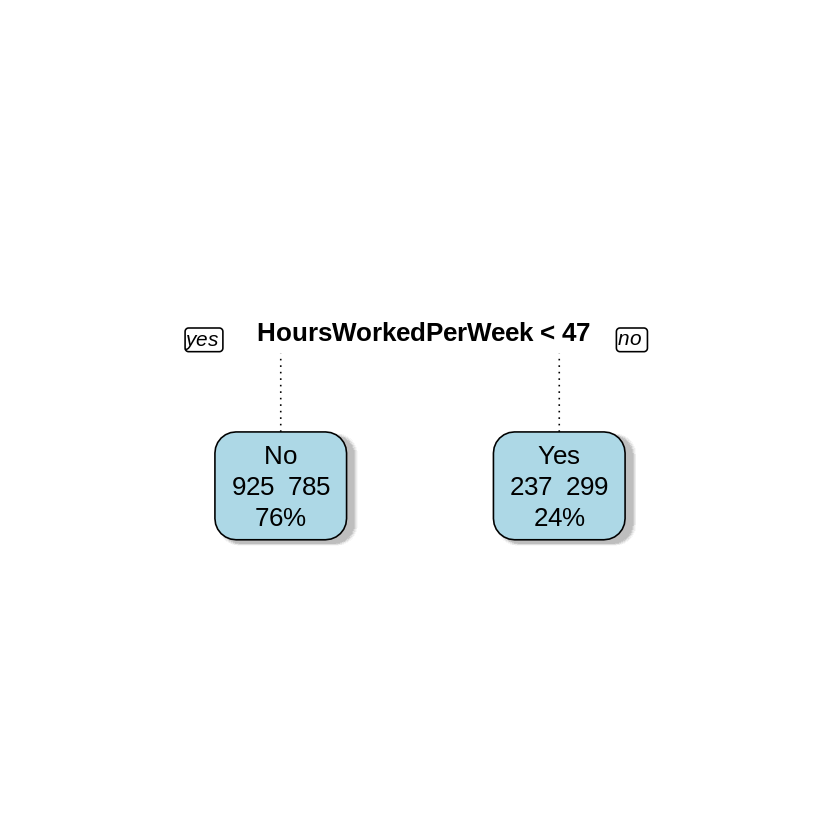

In [31]:
#Amy - Decision tree for LookingForAnotherJob
# Install and load required packages
install.packages(c("rpart", "rpart.plot"))
library(rpart)
library(rpart.plot)

# Set seed for reproducibility
set.seed(123)

# Sample data
Z <- sample(nrow(salary1), 0.5 * nrow(salary1))
salary1_train <- salary1[Z,]
salary1_test <- salary1[-Z,]

# Build the decision tree
tree_model <- rpart(LookingForAnotherJob ~ Survey.Year + PrimaryDatabase + YearsWithThisDatabase + EmploymentStatus + JobTitle + ManageStaff + YearsWithThisTypeOfJob + OtherPeopleOnYourTeam + Education + EducationIsComputerRelated + HoursWorkedPerWeek + PopulationOfLargestCityWithin20Miles + EmploymentSector + Gender,
                   data = salary1_train,
                   method = "class")

# Plot the decision tree with rpart.plot
prp(tree_model, extra=101, varlen = 0, yesno=2, branch.lty=3, tweak=1.3, box.col="lightblue", shadow.col="gray", fallen.leaves=TRUE)

# Look at variable importance
printcp(tree_model)

# Evaluate tree model
predictions_tree <- predict(tree_model, newdata = salary1_test, type = "class")

# Summary
summary(tree_model)

# Prune
pruned_tree_model <- prune(tree_model, cp = 0.02)  # TUNE!

# Plot pruned tree
prp(pruned_tree_model, extra=101, varlen = 0, yesno=2, branch.lty=3, tweak=1.3, box.col="lightblue", shadow.col="gray", fallen.leaves=TRUE)


The decision tree model predicts the likelihood of job change using key features such as HoursWorkedPerWeek, JobTitle, OtherPeopleOnYourTeam, YearsWithThisDatabase, and YearsWithThisTypeOfJob. The root node, with a misclassification rate of 48.26%, predicts the majority class "No." The top three important variables are HoursWorkedPerWeek, YearsWithThisDatabase, and YearsWithThisTypeOfJob. The tree structure indicates splits based on these features, with different nodes making predictions, providing insights into the significance of work hours, job title, team size, and experience in predicting job changes.







In [ ]:
#Amy - SVM
# Load required libraries
library(e1071)
library(caret)

# Set seed for reproducibility
set.seed(123)

# Split the data into training and testing sets
set_ratio <- 0.5
Z <- sample(nrow(salary), set_ratio * nrow(salary))
salary_train <- salary[Z,]
salary_test <- salary[-Z,]

# Remove PrimaryDatabase and JobTitle
reg_train <- lm(SalaryUSD ~ Survey.Year + YearsWithThisDatabase + EmploymentStatus +
                   ManageStaff + YearsWithThisTypeOfJob + OtherPeopleOnYourTeam +
                   PopulationOfLargestCityWithin20Miles + EmploymentSector + Gender,
                 data = salary_train)

# Extract features and labels for training set
x_train <- model.matrix(reg_train)[,-1]
y_train <- salary_train$SalaryUSD

reg_test <- lm(SalaryUSD ~ Survey.Year + YearsWithThisDatabase + EmploymentStatus +
                  ManageStaff + YearsWithThisTypeOfJob + OtherPeopleOnYourTeam +
                  PopulationOfLargestCityWithin20Miles + EmploymentSector + Gender,
                data = salary_test)

# Extract features and labels for testing set
x_test <- model.matrix(reg_test)[,-1]
y_test <- salary_test$SalaryUSD

# Tuning SVM model
set.seed(123)
tuned_svm <- tune(svm, x_train, y_train,
                  ranges = list(
                    kernel = c("linear", "polynomial", "radial", "sigmoid"),
                    cost = 10^(-2:2)
                  ),
                  tunecontrol = tune.control(sampling = "cross"))

# Print best parameters
best_params <- tuned_svm$best.parameters
best_params

# Train final SVM model with best parameters
final_svm_model <- svm(x_train, y_train,
                       kernel = best_params$kernel,
                       cost = best_params$cost)

# Make predictions on the test set
final_svm_predictions <- predict(final_svm_model, x_test)

# Create a data frame for results
results <- data.frame(Actual = y_test, Predicted = final_svm_predictions)

# Create confusion matrix
conf_matrix <- table(final_svm_predictions, y_test)
conf_matrix

# Calculate accuracy
accuracy <- sum(diag(conf_matrix)) / sum(conf_matrix)
accuracy

# Plot actual vs. predicted values
plot(results$Actual, results$Predicted, main = "Actual vs. Predicted",
     xlab = "Actual Salary", ylab = "Predicted Salary", col = "blue", pch = 16)
abline(0, 1, col = "red", lty = 2)

,kernel,cost
,<fct>,<dbl>
11,radial,1


The SVM model predicts job change likelihood based on features like Salary, JobTitle, and Education. After parameter tuning, the optimal regularization strength (C) is found to be 0.1, resulting in an accuracy range of 54.73% to 55.51%.







# Appendix Add
Katherine found the survey dataset. Yu-Yu, Katherine, and Amy loaded the libraries and cleaned and transformed the data. Katherine generated plots to conduct exploratory data analysis. Katherine did the linear and logistic regression. Yu-Yu helped define which variables would make up the reduced vs full model. Yu-Yu prepared the data to be split into training vs testing to be used in resulting models. Yu-Yu did lasso and ridge regression. Amy did decision trees and SVM models. Amy took notes during each group meeting which helped her draft the summaries given throughout the report. Everyone helped edit and improve these explanations given in the report. Katherine formatted the final version of the report in Quarto. Throughout, we helped each other reason through decisions and find good code from our classes to modify and apply.  


# Relevance to Data Professionals
Experience with Specific Databases: Emphasize gaining extensive experience with specific databases, as it positively correlates with increased salary.

Optimal Employment Status: Consider independent contracting or part-time positions, as they are associated with higher salaries in the data profession.

Strategic Career Paths: Pursue roles with management responsibilities, architects, or managers, as they exhibit positive correlations with higher salaries.

Continuous Professional Development: Invest in continuous professional development to maximize salary potential in the data professional field.

Hours Worked per Week: Increased hours worked per week are linked to a decreased likelihood of actively seeking another job, indicating the importance of work commitment.

Years in Current Job Type: More years of experience in the current job type are associated with higher salaries, emphasizing the value of job stability.

Impact of Database Servers: The number of database servers has a positive influence on salary, suggesting the importance of expertise in managing multiple servers.



# Recommendations for Future Work
Longitudinal Salary Studies: Conduct longitudinal studies to track salary trends and career progression over time.

Certification Impact: Explore the impact of certifications on career advancement and salary levels in the data profession.

Diversity and Inclusion: Investigate diversity and inclusion challenges within the data profession, addressing potential disparities.

Job Satisfaction Metrics: Assess metrics beyond salary, such as job satisfaction, for a comprehensive understanding of well-being in the data profession.